## Creating synthetic Dataset 

In [49]:
import pandas as pd
import numpy as np
import random

# --- Step 1: Create a more unique synthetic dataset for demonstration ---
def create_unique_synthetic_data(num_samples=100000):
    np.random.seed(42)

    # Generate a unique patient ID for each record
    patient_ids = range(1, num_samples + 1)

    # Generate more varied and unique data for each column
    genders = ['Male', 'Female', 'Other']
    diagnoses = ['Hypertension', 'Diabetes', 'Asthma', 'Arthritis', 'Migraine', 'Cold', 'Pneumonia', 'None']
    medications = ['Statins', 'Insulin', 'Antibiotics', 'Beta-blockers', 'Painkillers', 'Antihistamines', 'None']
    procedures = ['ECG', 'Blood Test', 'X-Ray', 'Physical Exam', 'Biopsy', 'MRI Scan', 'None']

    # Create more varied clinical notes
    def generate_note():
        templates = [
            'Patient presents with symptoms of {symptom}. No serious concerns noted.',
            'History of {condition}. Patient is stable.',
            'Admission for a procedure due to elevated {metric} levels.',
            'Routine checkup. Patient shows signs of improvement.',
            'Patient complains of {complaint}. Being monitored closely.'
        ]
        symptoms = ['fatigue', 'headache', 'fever', 'cough']
        conditions = ['heart disease', 'diabetes', 'hypertension']
        metrics = ['blood pressure', 'blood sugar', 'cholesterol']
        complaints = ['nausea', 'dizziness', 'shortness of breath']

        template = random.choice(templates)
        # Use a dictionary to format the template based on the chosen keys
        return template.format(
            symptom=random.choice(symptoms) if '{symptom}' in template else '',
            condition=random.choice(conditions) if '{condition}' in template else '',
            metric=random.choice(metrics) if '{metric}' in template else '',
            complaint=random.choice(complaints) if '{complaint}' in template else ''
        ).strip()

    data = {
        'patient_id': patient_ids,
        'age': np.random.randint(20, 90, num_samples),
        'gender': np.random.choice(genders, num_samples, p=[0.49, 0.49, 0.02]),
        'systolic_bp': np.random.normal(125, 15, num_samples).astype(int),
        'diastolic_bp': np.random.normal(80, 10, num_samples).astype(int),
        'heart_rate': np.random.normal(75, 10, num_samples).astype(int),
        'cholesterol': np.random.normal(200, 40, num_samples).astype(int),
        'blood_sugar': np.random.normal(110, 25, num_samples).astype(int),
        'bmi': np.random.normal(27, 5, num_samples),
        'diagnosis': np.random.choice(diagnoses, num_samples, p=[0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
        'medication': np.random.choice(medications, num_samples, p=[0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.2]),
        'procedure': np.random.choice(procedures, num_samples, p=[0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.2]),
        'length_of_stay_days': np.random.uniform(2, 15, num_samples).round(0).astype(int),
        'disease_risk': np.random.choice(['Low', 'Moderate', 'High'], num_samples, p=[0.6, 0.3, 0.1]),
        'clinical_notes': [generate_note() for _ in range(num_samples)]
    }
    df = pd.DataFrame(data)
    df.to_csv('synthetic_health_data.csv', index=False)
    print("Synthetic dataset created with more unique data: synthetic_health_data.csv")
    return df

# Run the function to create the new dummy data
try:
    df = pd.read_csv('synthetic_health_data.csv')
    print("Dataset loaded from file.")
except FileNotFoundError:
    print("File not found. Creating a new synthetic dataset.")
    df = create_unique_synthetic_data()


# --- Step 2: Handle Missing Values ---
# Impute missing values in categorical columns with a placeholder
df[['diagnosis', 'medication', 'procedure']] = df[['diagnosis', 'medication', 'procedure']].replace('None', np.nan)
df[['diagnosis', 'medication', 'procedure']] = df[['diagnosis', 'medication', 'procedure']].fillna('None')

# Drop the patient_id as it's an identifier, not a feature
df = df.drop(columns=['patient_id'])

# Check the cleaned data info
print("\nCleaned Data Info:")
df.info()

df.head()

Dataset loaded from file.

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  int64  
 1   gender               100000 non-null  object 
 2   systolic_bp          100000 non-null  int64  
 3   diastolic_bp         100000 non-null  int64  
 4   heart_rate           100000 non-null  int64  
 5   cholesterol          100000 non-null  int64  
 6   blood_sugar          100000 non-null  int64  
 7   bmi                  100000 non-null  float64
 8   diagnosis            100000 non-null  object 
 9   medication           100000 non-null  object 
 10  procedure            100000 non-null  object 
 11  length_of_stay_days  100000 non-null  int64  
 12  disease_risk         100000 non-null  object 
 13  clinical_notes       100000 non-null  object 
dtypes: float64(1), int64(7)

age  gender  systolic_bp  diastolic_bp  heart_rate  cholesterol  \
0   71    Male          147            79          84          187   
1   34  Female          111            80          69          216   
2   80    Male          142            78          68          201   
3   40  Female          130            92          67          162   
4   43  Female          155            72          80          216   

   blood_sugar        bmi  diagnosis     medication      procedure  \
0          171  31.574934  Pneumonia    Painkillers     Blood Test   
1           97  24.237218   Migraine           None  Physical Exam   
2           92  17.797760  Pneumonia    Painkillers            ECG   
3           89  22.987696       None        Statins     Blood Test   
4          111  26.031635     Asthma  Beta-blockers            ECG   

   length_of_stay_days disease_risk  \
0                    4     Moderate   
1                    2     Moderate   
2                   15     Moderate   
3                    3     Moderate   
4                    5     Moderate   

                                      clinical_notes  
0  Routine checkup. Patient shows signs of improv...  
1  Patient presents with symptoms of fever. No se...  
2  Admission for a procedure due to elevated bloo...  
3  Admission for a procedure due to elevated bloo...  
4  Routine checkup. Patient shows signs of improv...

In [50]:
## Feature correaltion
import pandas as pd
import numpy as np
import random

# Re-use your existing synthetic dataset creation function
df = create_unique_synthetic_data(100000)  # or load from CSV

# --- Step: Add realistic disease_risk based on numeric features ---
def assign_disease_risk(row):
    # Start with a risk score
    risk_score = 0
    
    # Age factor: higher age → higher risk
    if row['age'] >= 65:
        risk_score += 2
    elif row['age'] >= 50:
        risk_score += 1
    
    # Blood pressure factor
    if row['systolic_bp'] >= 140 or row['diastolic_bp'] >= 90:
        risk_score += 2
    elif row['systolic_bp'] >= 130 or row['diastolic_bp'] >= 80:
        risk_score += 1
    
    # Cholesterol factor
    if row['cholesterol'] >= 240:
        risk_score += 2
    elif row['cholesterol'] >= 200:
        risk_score += 1
    
    # BMI factor
    if row['bmi'] >= 30:
        risk_score += 2
    elif row['bmi'] >= 25:
        risk_score += 1
    
    # Blood sugar factor
    if row['blood_sugar'] >= 180:
        risk_score += 2
    elif row['blood_sugar'] >= 120:
        risk_score += 1
    
    # Map total risk_score to disease_risk category
    if risk_score >= 6:
        return 'High'
    elif risk_score >= 3:
        return 'Moderate'
    else:
        return 'Low'

# Apply function to dataframe
df['disease_risk'] = df.apply(assign_disease_risk, axis=1)

# Check distribution
print(df['disease_risk'].value_counts(normalize=True))

# Save updated dataset
df.to_csv('synthetic_health_data_with_risk.csv', index=False)
print("Updated synthetic dataset saved: synthetic_health_data_with_risk.csv")


Synthetic dataset created with more unique data: synthetic_health_data.csv
disease_risk
Moderate    0.61951
Low         0.21928
High        0.16121
Name: proportion, dtype: float64
Updated synthetic dataset saved: synthetic_health_data_with_risk.csv


In [4]:
import os
print(os.getcwd())


c:\Users\imaya\Desktop\emayan


## Data Loading

In [51]:
import pandas as pd

# Load the CSV from the folder
df = pd.read_csv('healthai-suite/synthetic_health_data_with_risk.csv')

# Check first few rows
print(df.head())


   patient_id  age  gender  systolic_bp  diastolic_bp  heart_rate  \
0           1   71    Male          147            79          84   
1           2   34  Female          111            80          69   
2           3   80    Male          142            78          68   
3           4   40  Female          130            92          67   
4           5   43  Female          155            72          80   

   cholesterol  blood_sugar        bmi  diagnosis     medication  \
0          187          171  31.574934  Pneumonia    Painkillers   
1          216           97  24.237218   Migraine            NaN   
2          201           92  17.797760  Pneumonia    Painkillers   
3          162           89  22.987696        NaN        Statins   
4          216          111  26.031635     Asthma  Beta-blockers   

       procedure  length_of_stay_days disease_risk  \
0     Blood Test                    4         High   
1  Physical Exam                    2          Low   
2            E

# EDA (Explortory data analysis)

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Univariate

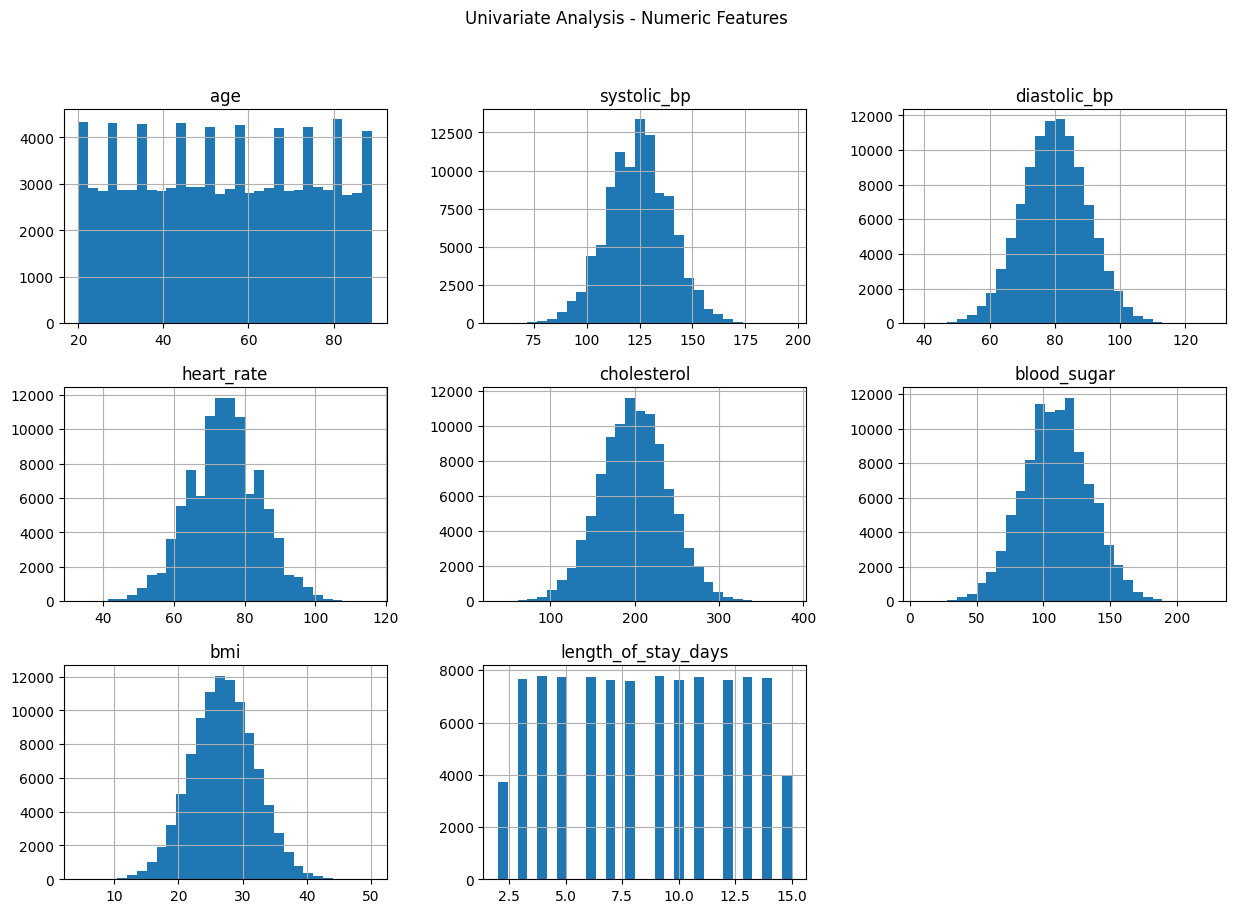

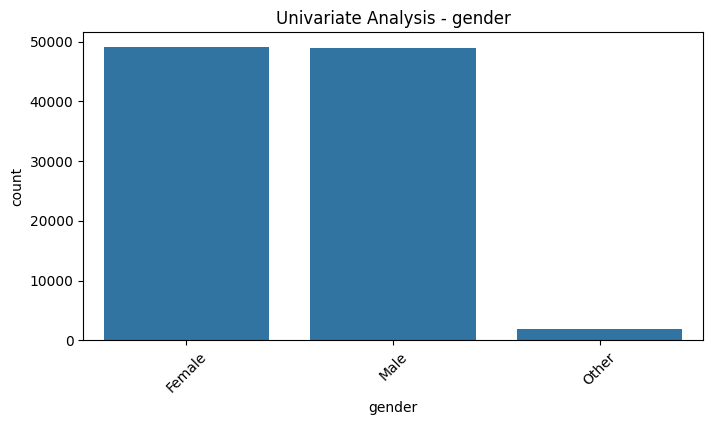

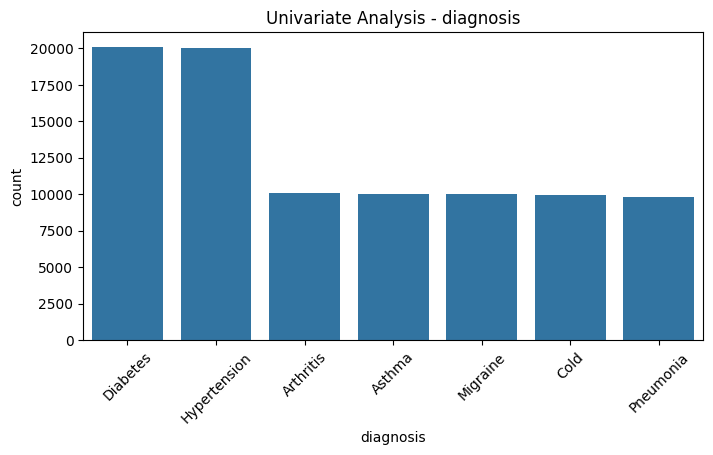

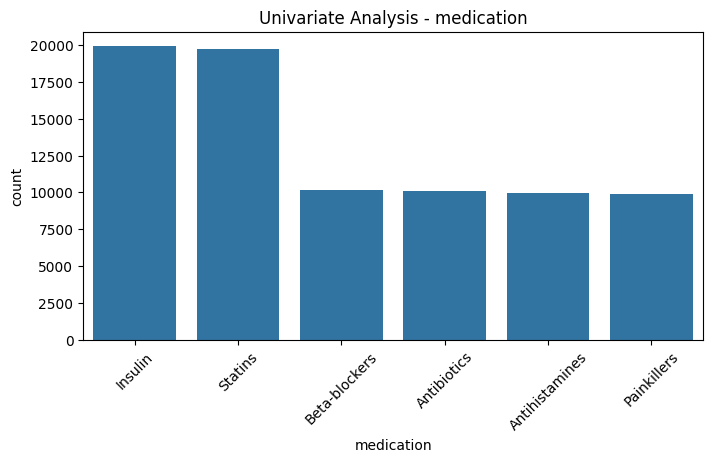

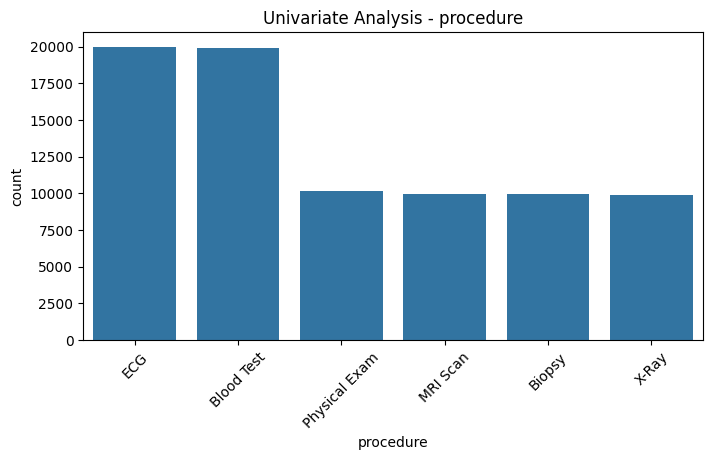

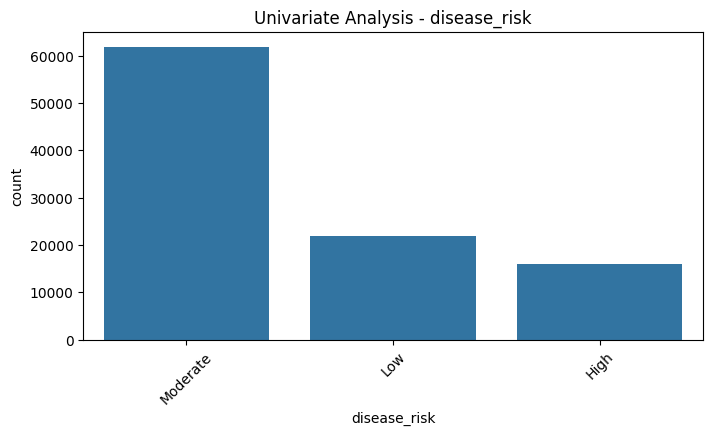

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric features
numeric_cols = ['age', 'systolic_bp', 'diastolic_bp', 'heart_rate', 
                'cholesterol', 'blood_sugar', 'bmi', 'length_of_stay_days']

# Histograms for numeric features
df[numeric_cols].hist(figsize=(15,10), bins=30)
plt.suptitle("Univariate Analysis - Numeric Features")
plt.show()

# Categorical features
categorical_cols = ['gender', 'diagnosis', 'medication', 'procedure', 'disease_risk']
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Univariate Analysis - {col}")
    plt.xticks(rotation=45)
    plt.show()


## Bivariate

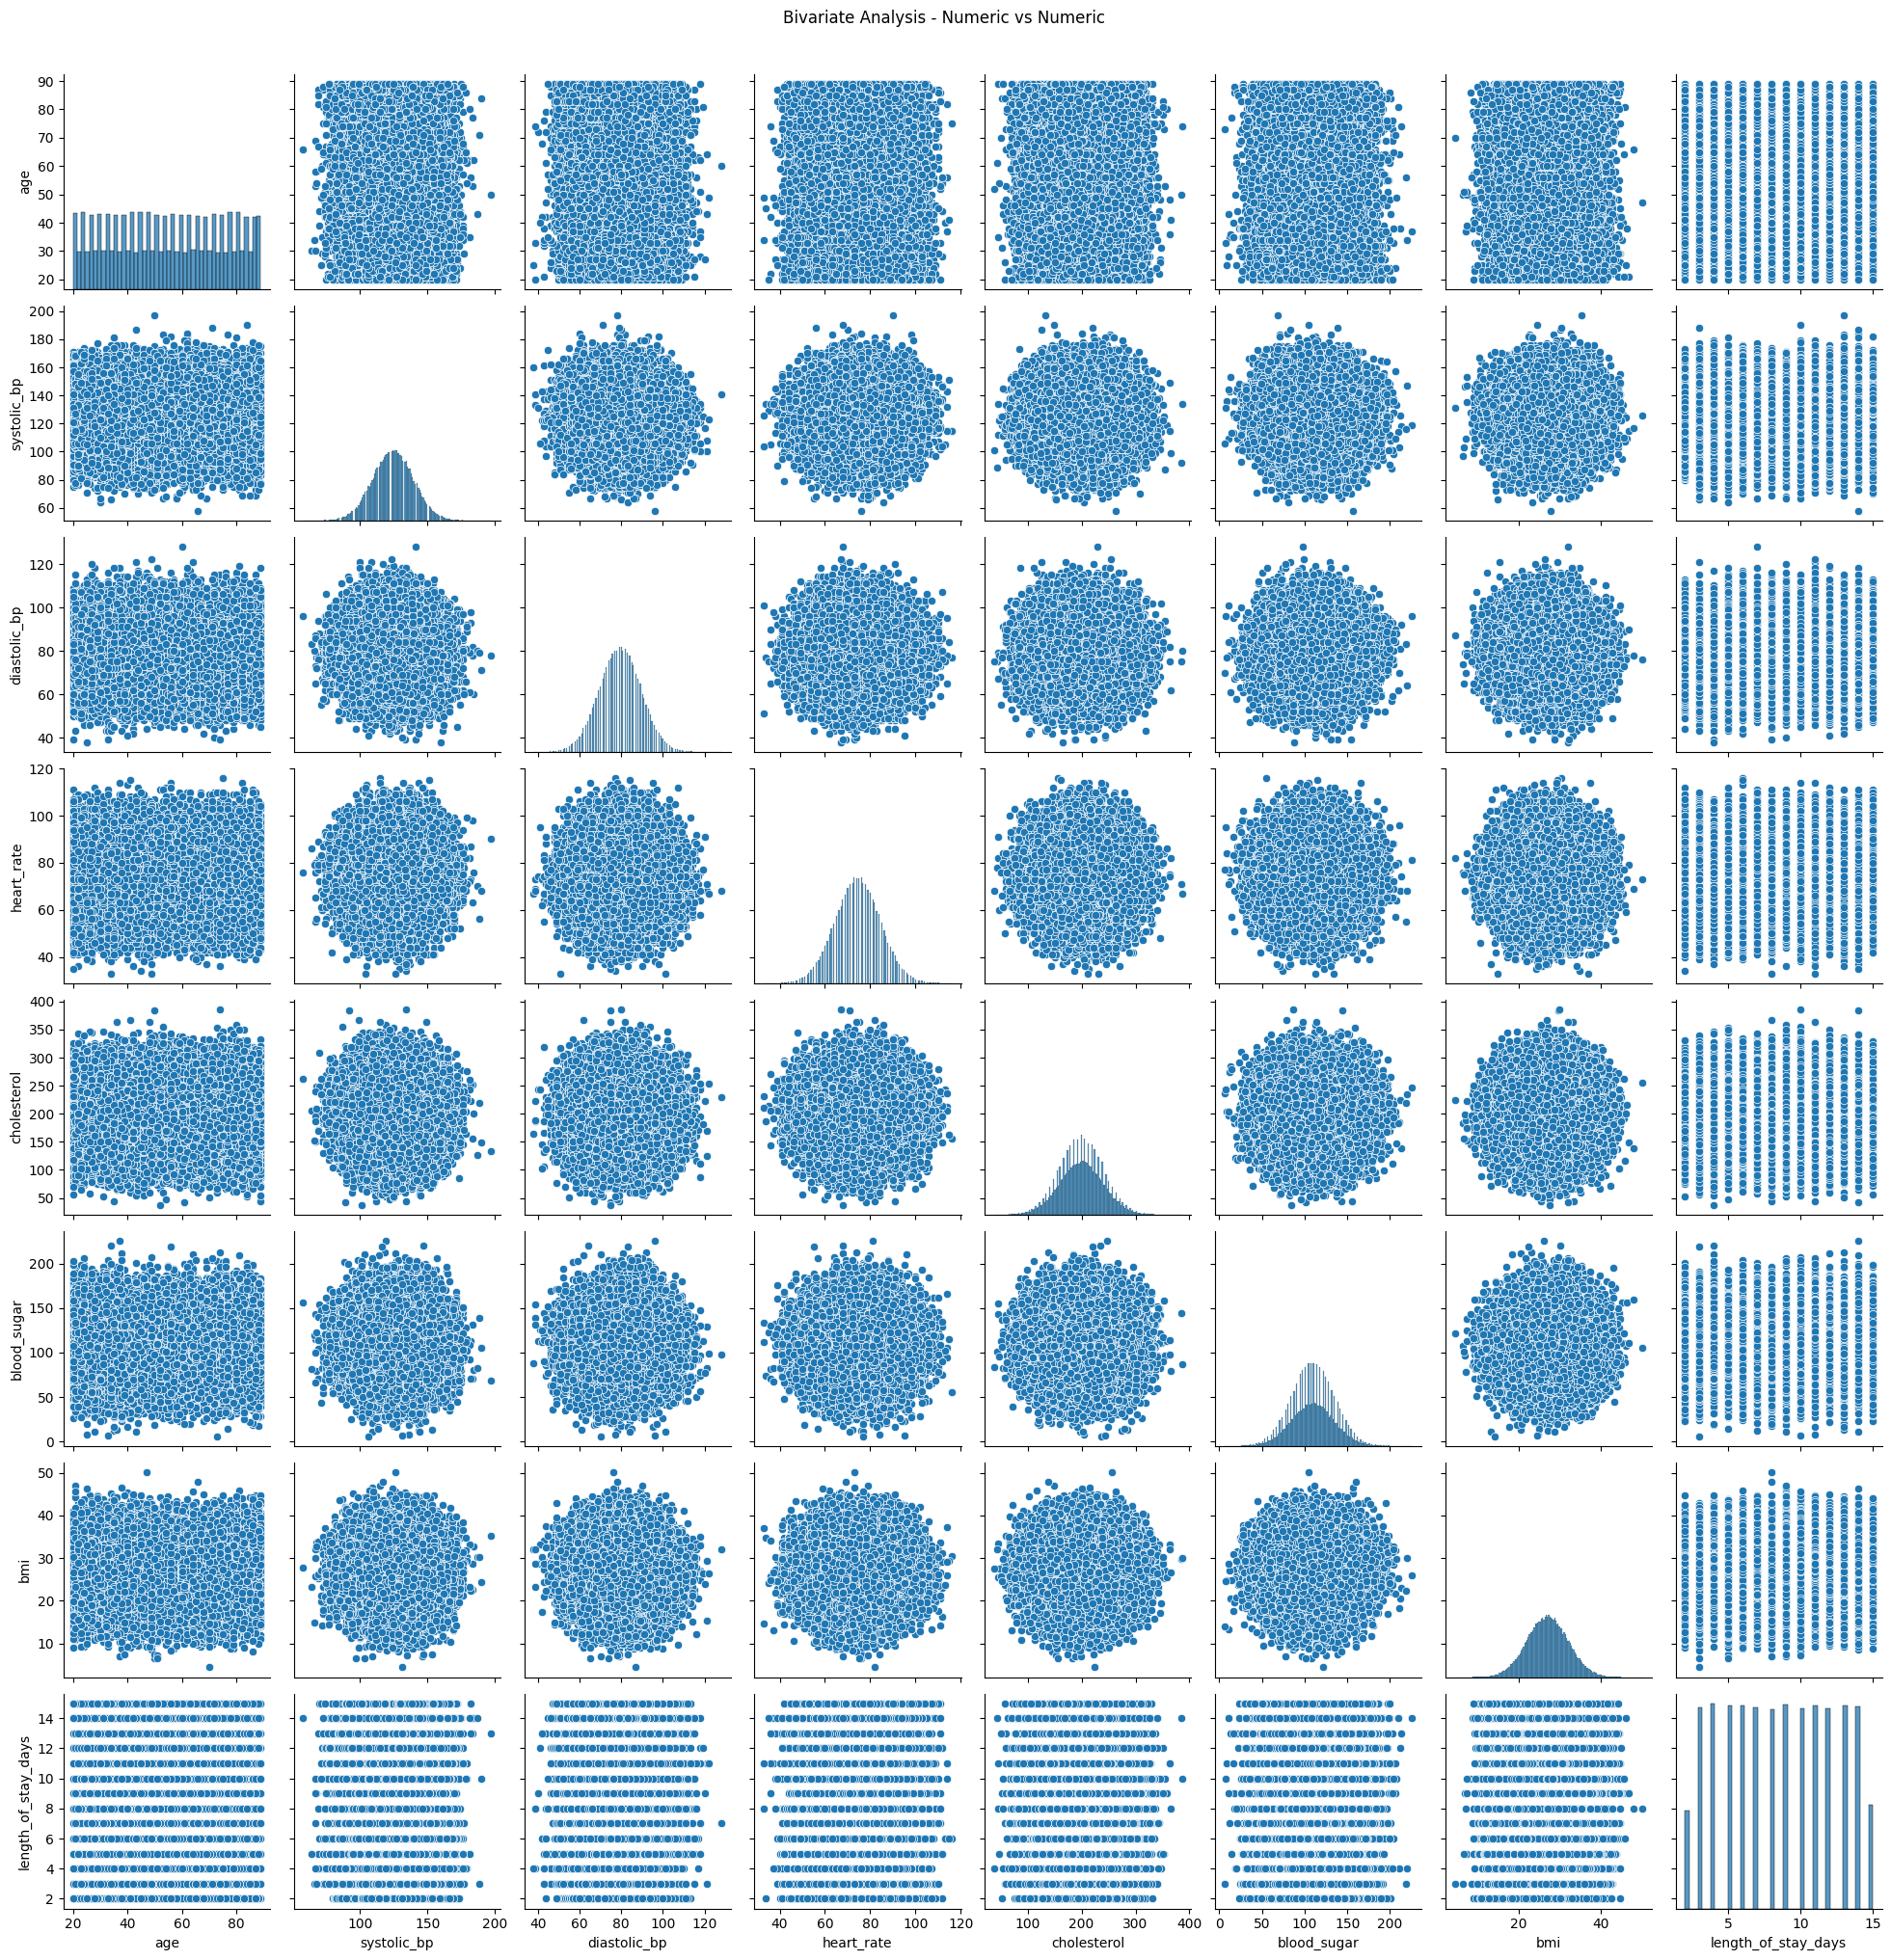

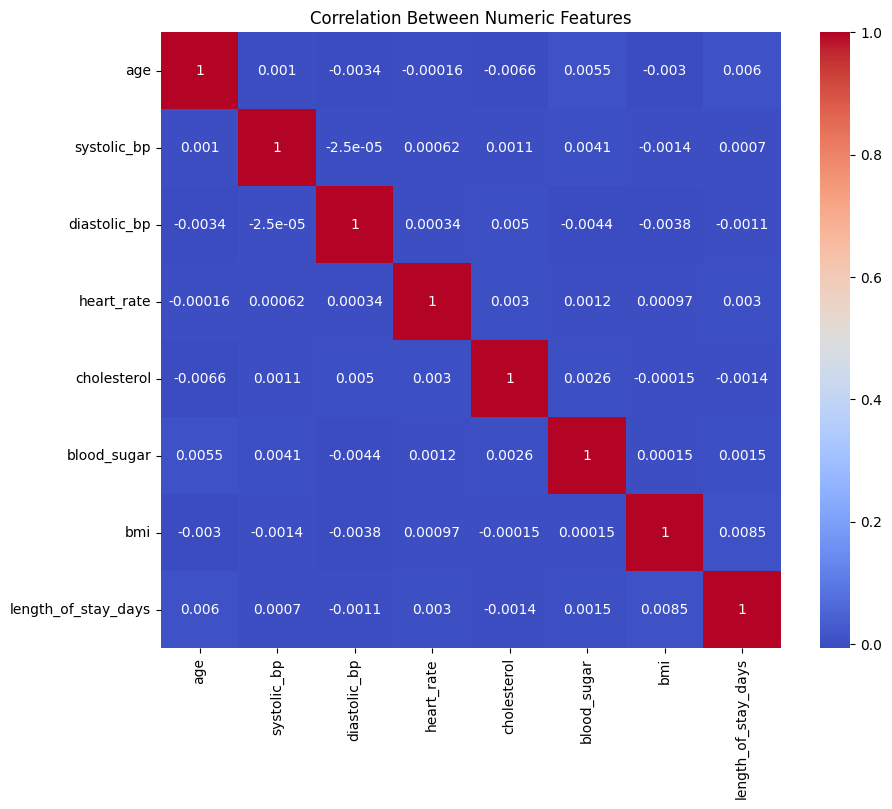

In [8]:
##Numeric vs Numeric

# Scatter plots
sns.pairplot(df[numeric_cols])
plt.suptitle("Bivariate Analysis - Numeric vs Numeric", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()


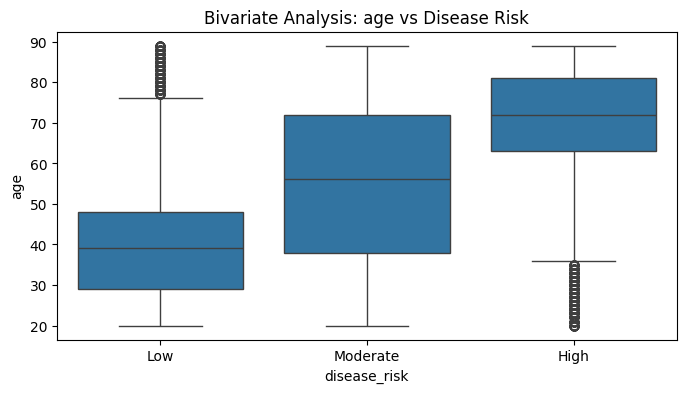

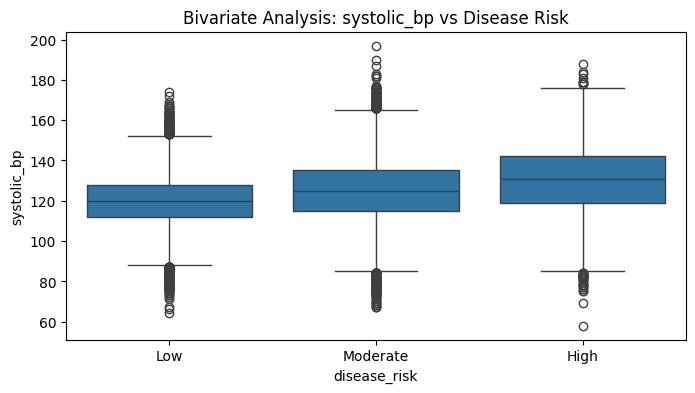

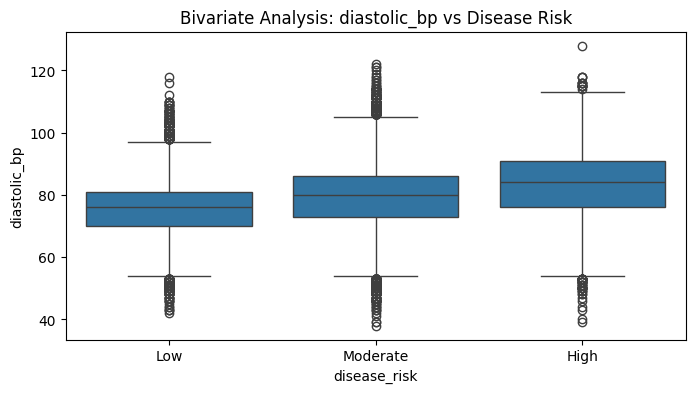

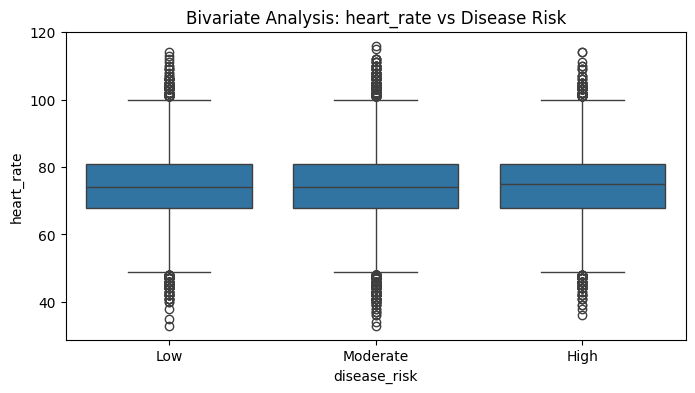

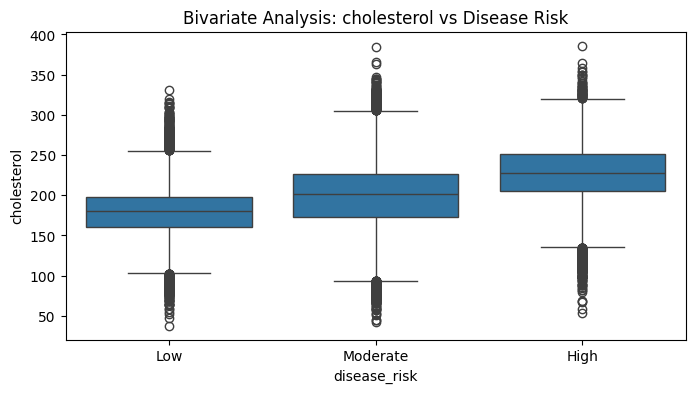

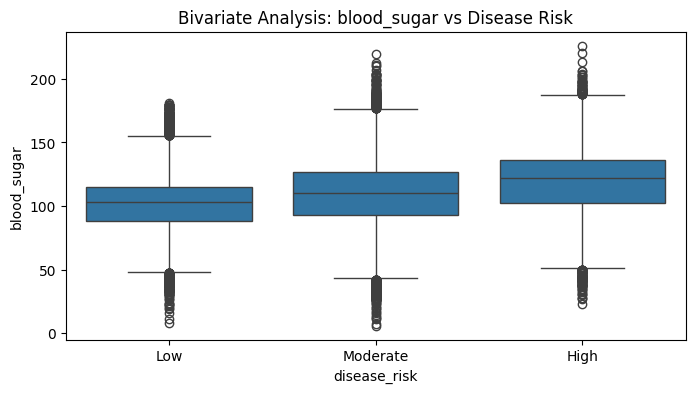

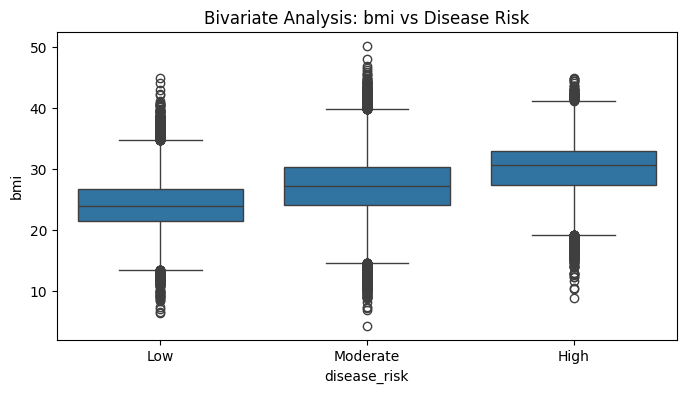

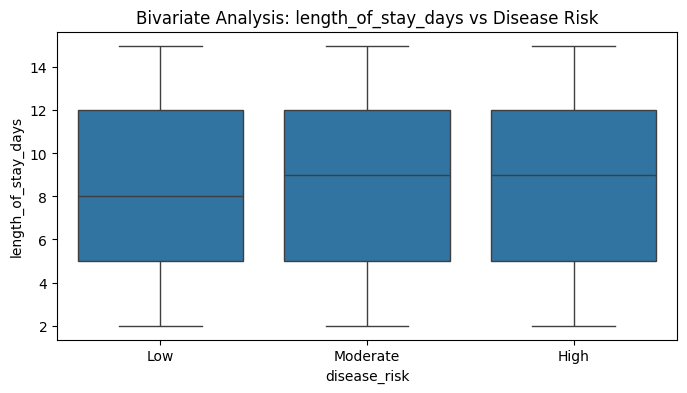

In [9]:
## Numeric vs Categorical
# Boxplots: numeric distribution by disease_risk
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x='disease_risk', y=col, order=['Low','Moderate','High'])
    plt.title(f"Bivariate Analysis: {col} vs Disease Risk")
    plt.show()


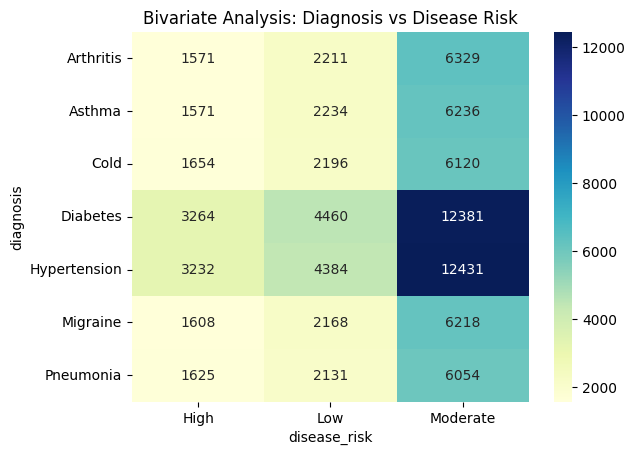

In [10]:
##Categorical vs Categorical

# Cross-tab and heatmap: diagnosis vs disease_risk
ct = pd.crosstab(df['diagnosis'], df['disease_risk'])
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Bivariate Analysis: Diagnosis vs Disease Risk")
plt.show()


## Multivariate

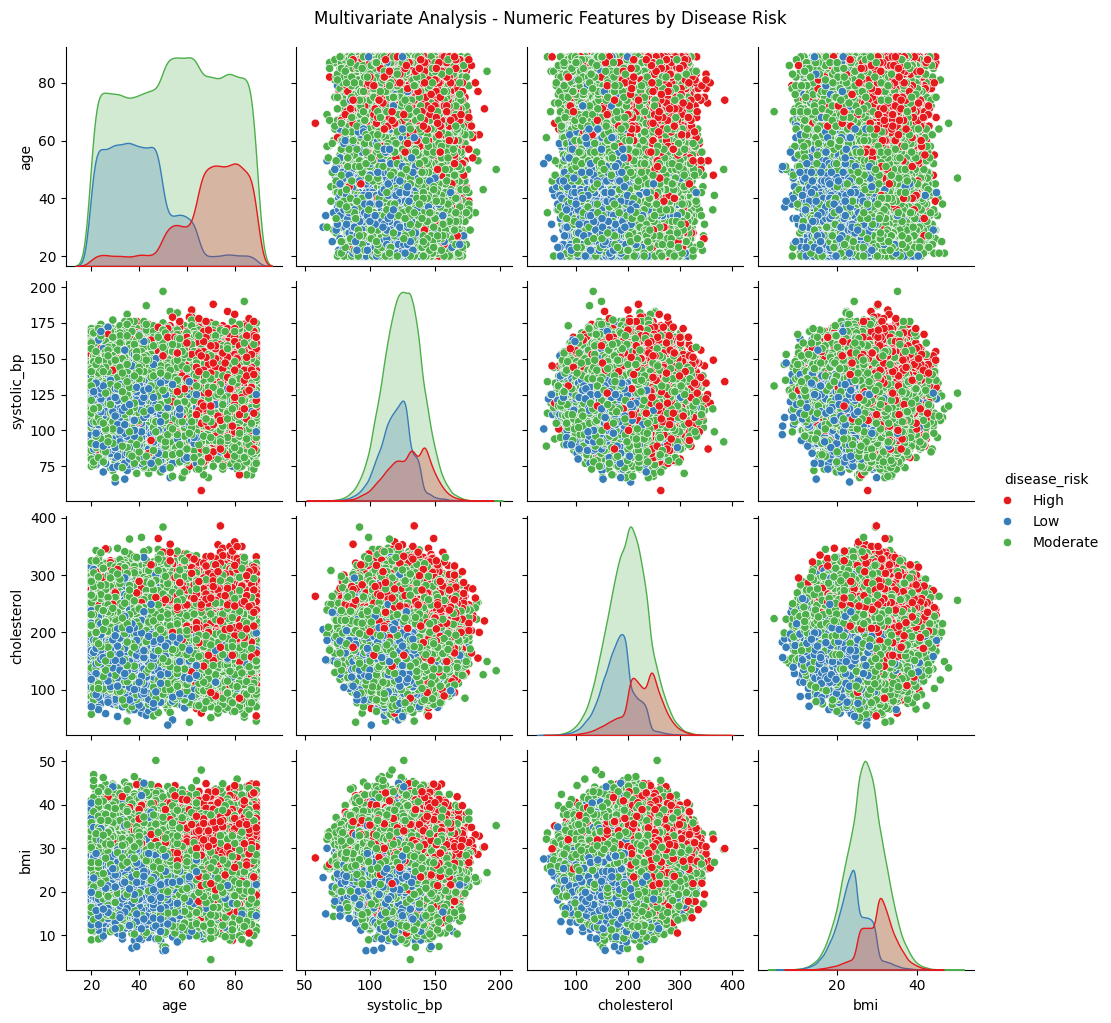

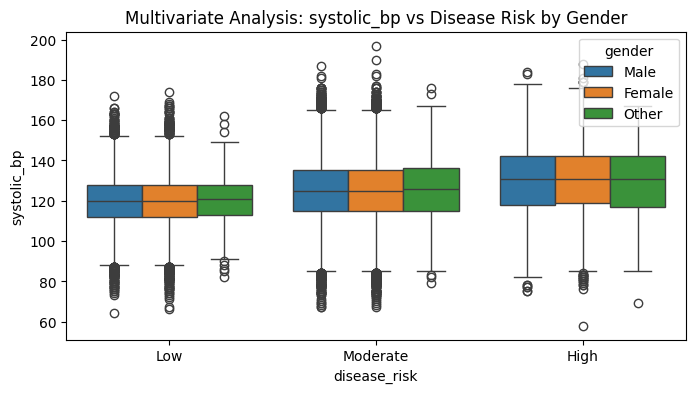

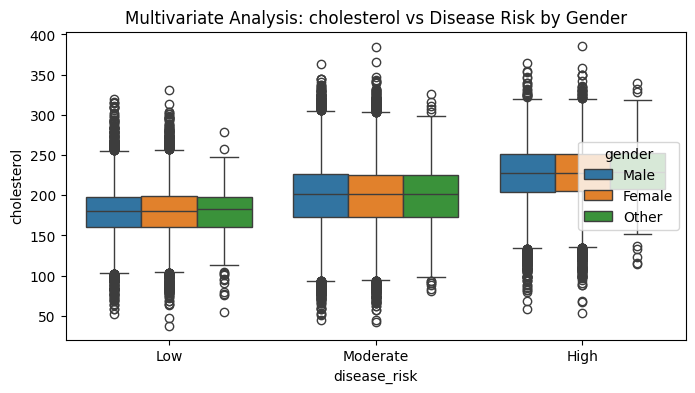

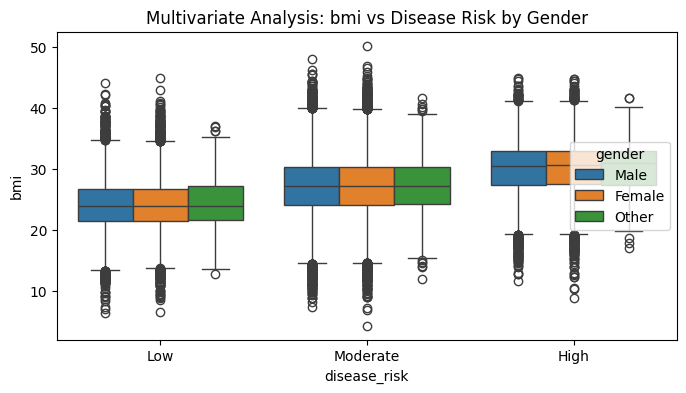

In [11]:
# Pairplot colored by disease_risk
sns.pairplot(df, vars=['age', 'systolic_bp', 'cholesterol', 'bmi'], hue='disease_risk', palette='Set1')
plt.suptitle("Multivariate Analysis - Numeric Features by Disease Risk", y=1.02)
plt.show()

# Boxplots of numeric vs categorical with another categorical hue
for col in ['systolic_bp', 'cholesterol', 'bmi']:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x='disease_risk', y=col, hue='gender', order=['Low','Moderate','High'])
    plt.title(f"Multivariate Analysis: {col} vs Disease Risk by Gender")
    plt.show()


## Preprcoessing

In [53]:
df = pd.read_csv('healthai-suite/synthetic_health_data_with_risk.csv')
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (100000, 15)


patient_id  age  gender  systolic_bp  diastolic_bp  heart_rate  \
0           1   71    Male          147            79          84   
1           2   34  Female          111            80          69   
2           3   80    Male          142            78          68   
3           4   40  Female          130            92          67   
4           5   43  Female          155            72          80   

   cholesterol  blood_sugar        bmi  diagnosis     medication  \
0          187          171  31.574934  Pneumonia    Painkillers   
1          216           97  24.237218   Migraine            NaN   
2          201           92  17.797760  Pneumonia    Painkillers   
3          162           89  22.987696        NaN        Statins   
4          216          111  26.031635     Asthma  Beta-blockers   

       procedure  length_of_stay_days disease_risk  \
0     Blood Test                    4         High   
1  Physical Exam                    2          Low   
2            ECG                   15     Moderate   
3     Blood Test                    3          Low   
4            ECG                    5     Moderate   

                                      clinical_notes  
0  Routine checkup. Patient shows signs of improv...  
1  Patient presents with symptoms of fever. No se...  
2  Admission for a procedure due to elevated bloo...  
3  Admission for a procedure due to elevated bloo...  
4  Routine checkup. Patient shows signs of improv...

In [54]:
##Handle Missing Values

# Replace 'None' with np.nan if any, then fill
categorical_cols = ['diagnosis', 'medication', 'procedure']
df[categorical_cols] = df[categorical_cols].replace('None', np.nan)
df[categorical_cols] = df[categorical_cols].fillna('None')

# Check
print(df.isna().sum())


patient_id             0
age                    0
gender                 0
systolic_bp            0
diastolic_bp           0
heart_rate             0
cholesterol            0
blood_sugar            0
bmi                    0
diagnosis              0
medication             0
procedure              0
length_of_stay_days    0
disease_risk           0
clinical_notes         0
dtype: int64


In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler


##Encode Categorical Features

# Encode categorical columns (including target)
cat_cols = ['gender', 'diagnosis', 'medication', 'procedure', 'disease_risk']
le_dict = {}  # Save encoders if needed later

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  # store encoder for inverse transform


In [56]:
print(df.head())
print(df.info())



   patient_id  age  gender  systolic_bp  diastolic_bp  heart_rate  \
0           1   71       1          147            79          84   
1           2   34       0          111            80          69   
2           3   80       1          142            78          68   
3           4   40       0          130            92          67   
4           5   43       0          155            72          80   

   cholesterol  blood_sugar        bmi  diagnosis  medication  procedure  \
0          187          171  31.574934          7           5          1   
1          216           97  24.237218          5           4          5   
2          201           92  17.797760          7           5          2   
3          162           89  22.987696          6           6          1   
4          216          111  26.031635          1           2          2   

   length_of_stay_days  disease_risk  \
0                    4             0   
1                    2             1   
2       

## Outliers

In [57]:
numeric_cols = ['age', 'systolic_bp', 'diastolic_bp', 'heart_rate',
                'cholesterol', 'blood_sugar', 'bmi', 'length_of_stay_days']

# Detect outliers using IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


age: 0 outliers
systolic_bp: 533 outliers
diastolic_bp: 947 outliers
heart_rate: 991 outliers
cholesterol: 597 outliers
blood_sugar: 870 outliers
bmi: 712 outliers
length_of_stay_days: 0 outliers


In [58]:
##Treating outliers 

numeric_cols = ['systolic_bp', 'diastolic_bp', 'heart_rate', 
                'cholesterol', 'blood_sugar', 'bmi']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])


In [59]:
print(df.isna().sum())
## no misssng values no imputation needed.

patient_id             0
age                    0
gender                 0
systolic_bp            0
diastolic_bp           0
heart_rate             0
cholesterol            0
blood_sugar            0
bmi                    0
diagnosis              0
medication             0
procedure              0
length_of_stay_days    0
disease_risk           0
clinical_notes         0
dtype: int64


## Feature Engineering

In [60]:
import pandas as pd
import numpy as np

# Assume df is already loaded and cleaned

# --- 1. BMI Category ---
# 0 = Underweight, 1 = Normal, 2 = Overweight, 3 = Obese
df['bmi_category'] = pd.cut(df['bmi'], bins=[0,18.5,25,30,100], labels=[0,1,2,3])

# --- 2. Age Group ---
# 0: 20-30, 1: 31-45, 2: 46-60, 3: 61-75, 4: 76-90
df['age_group'] = pd.cut(df['age'], bins=[19,30,45,60,75,90], labels=[0,1,2,3,4])

# --- 3. Blood Pressure Categories ---
df['systolic_bp_category'] = pd.cut(df['systolic_bp'], bins=[0,120,129,139,200], labels=[0,1,2,3])
df['diastolic_bp_category'] = pd.cut(df['diastolic_bp'], bins=[0,80,89,99,150], labels=[0,1,2,3])

# --- 4. High-risk Medication Flag ---
high_risk_meds = ['Insulin', 'Beta-blockers', 'Statins']
df['high_risk_med'] = df['medication'].apply(lambda x: 1 if x in high_risk_meds else 0)

# --- 5. Procedure Flag ---
df['had_procedure'] = df['procedure'].apply(lambda x: 0 if x=='None' else 1)

# --- 6. Clinical Notes Features ---
# Length of notes
df['note_length'] = df['clinical_notes'].apply(lambda x: len(x.split()))

# Key symptoms flags
key_symptoms = ['fatigue','headache','fever','cough','nausea','dizziness','shortness']
for symptom in key_symptoms:
    df[f'note_{symptom}'] = df['clinical_notes'].apply(lambda x: 1 if symptom in x.lower() else 0)

# --- 7. Optional Risk Score ---
df['risk_score'] = df['age']/90 + df['systolic_bp']/200 + df['cholesterol']/300
df['risk_score'] = df['risk_score'] / df['risk_score'].max()

print("Feature engineering completed.")
df.head()


Feature engineering completed.


patient_id  age  gender  systolic_bp  diastolic_bp  heart_rate  \
0           1   71       1        147.0          79.0        84.0   
1           2   34       0        111.0          80.0        69.0   
2           3   80       1        142.0          78.0        68.0   
3           4   40       0        130.0          92.0        67.0   
4           5   43       0        155.0          72.0        80.0   

   cholesterol  blood_sugar        bmi  diagnosis  ...  had_procedure  \
0        187.0        171.0  31.574934          7  ...              1   
1        216.0         97.0  24.237218          5  ...              1   
2        201.0         92.0  17.797760          7  ...              1   
3        162.0         89.0  22.987696          6  ...              1   
4        216.0        111.0  26.031635          1  ...              1   

   note_length  note_fatigue  note_headache note_fever note_cough note_nausea  \
0            7             0              0          0          0           0   
1           10             0              0          1          0           0   
2           10             0              0          0          0           0   
3           10             0              0          0          0           0   
4            7             0              0          0          0           0   

  note_dizziness note_shortness  risk_score  
0              0              0    0.764741  
1              0              0    0.588643  
2              0              0    0.808073  
3              0              0    0.582113  
4              0              0    0.702612  

[5 rows x 30 columns]

In [39]:
#rescaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_cols_to_scale] = scaler.fit_transform(df[numeric_cols_to_scale])

print("Rescaling completed after feature engineering.")


Rescaling completed after feature engineering.


In [43]:
df['age_group'].value_counts(dropna=False)


age_group
NaN    100000
0           0
1           0
2           0
3           0
4           0
Name: count, dtype: int64

In [44]:
# Get index of 'age' inside numeric_cols_to_scale list
age_index = numeric_cols_to_scale.index('age')

# Extract the original mean and std used for scaling
age_mean = scaler.mean_[age_index]
age_std = scaler.scale_[age_index]

# Reverse scaling
df['age_original'] = df['age'] * age_std + age_mean


In [45]:
df['age_group'] = pd.cut(df['age_original'], 
                         bins=[19, 30, 45, 60, 75, 90], 
                         labels=[0, 1, 2, 3, 4],
                         include_lowest=True)


In [62]:
df['age_group'].value_counts()


age_group
1    21580
2    21451
3    21264
4    19872
0    15833
Name: count, dtype: int64

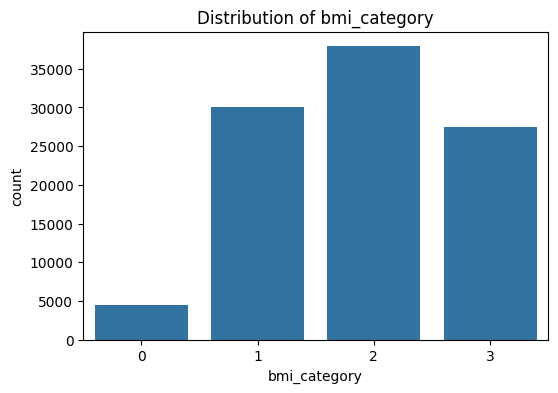

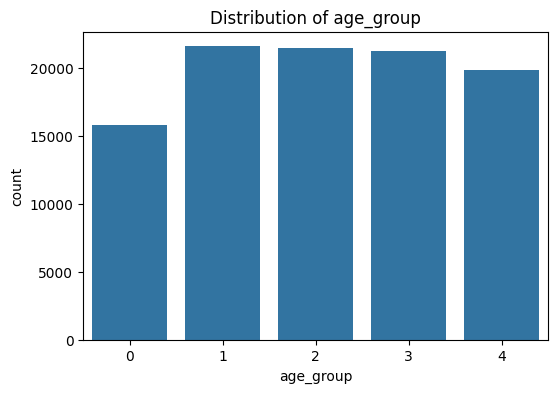

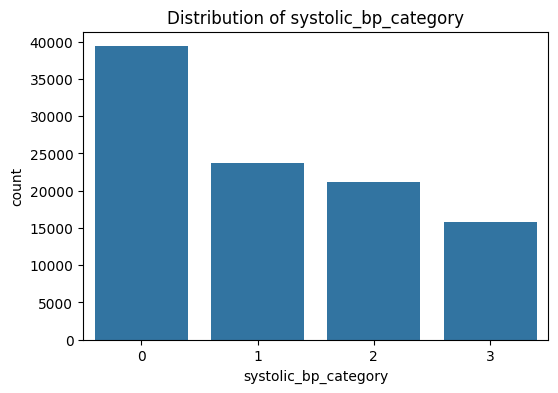

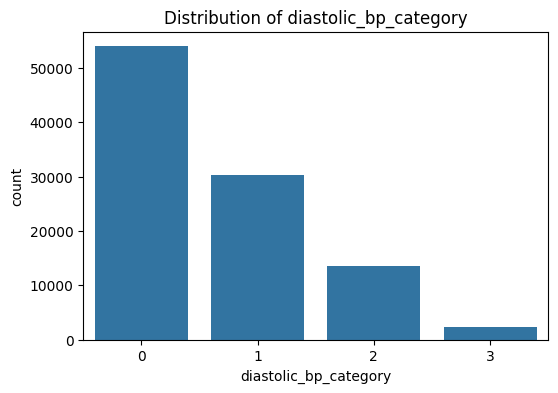

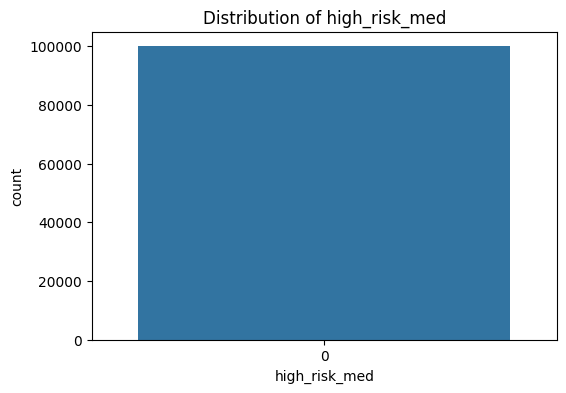

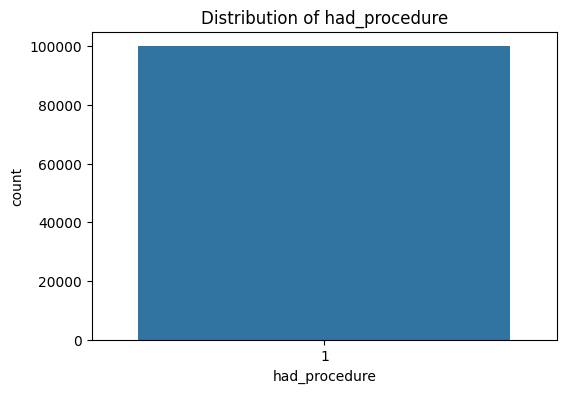

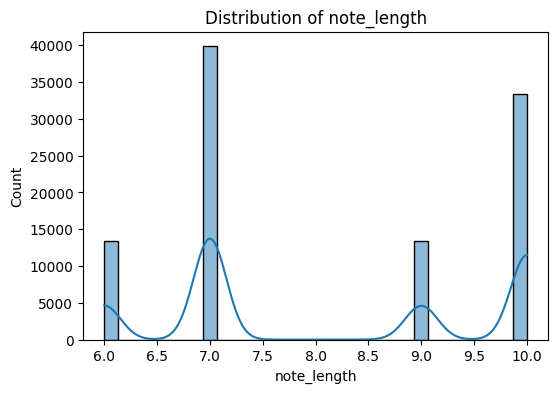

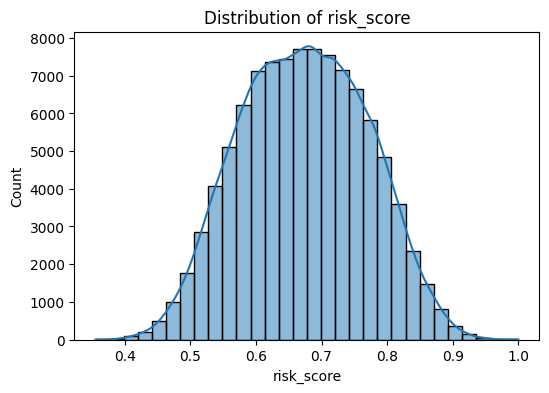

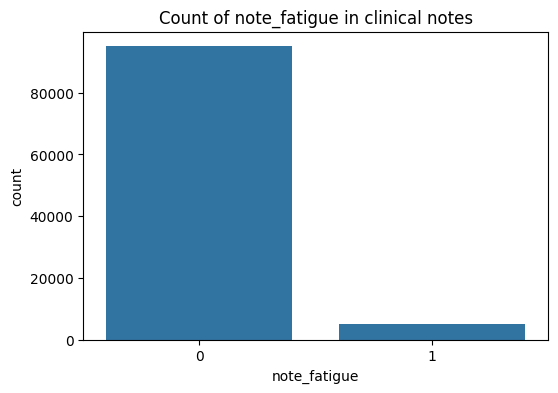

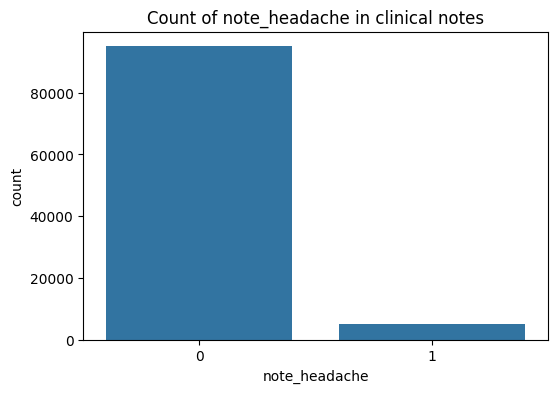

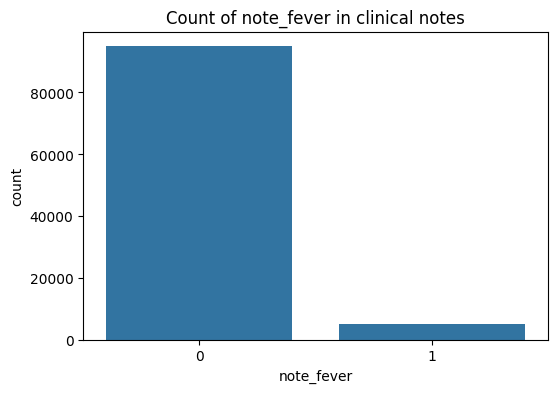

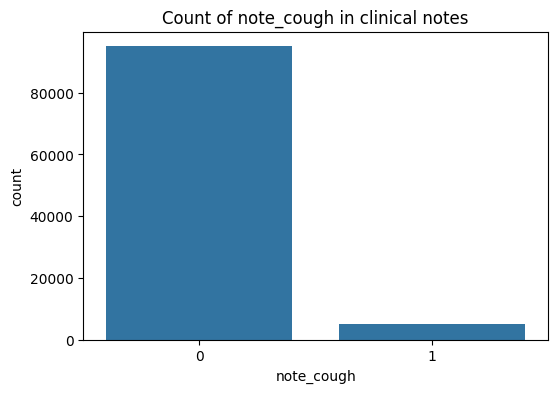

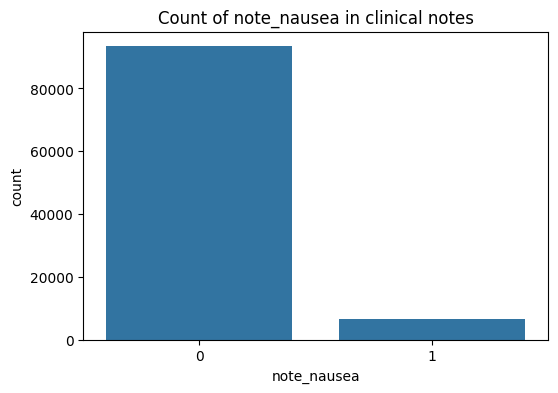

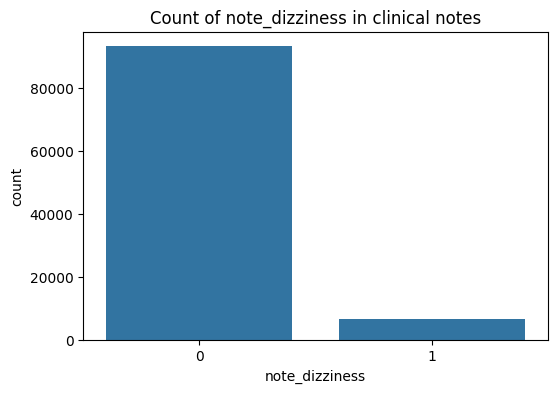

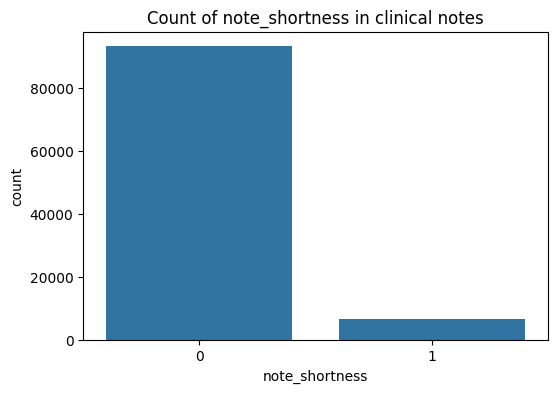

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Categorical Features (as counts) ---
categorical_features = ['bmi_category', 'age_group', 
                        'systolic_bp_category', 'diastolic_bp_category', 
                        'high_risk_med', 'had_procedure']

for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# --- 2. Numeric / Continuous Features ---
numeric_features = ['note_length', 'risk_score']

for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# --- 3. Clinical Notes Symptom Flags ---
symptom_features = [f'note_{s}' for s in ['fatigue','headache','fever','cough','nausea','dizziness','shortness']]

for col in symptom_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col} in clinical notes')
    plt.show()


In [65]:
## scaling numerical values

from sklearn.preprocessing import StandardScaler

# List of numeric columns to scale (update if needed)
numeric_cols_to_scale = [
    'age', 'systolic_bp', 'diastolic_bp', 'heart_rate',
    'cholesterol', 'blood_sugar', 'bmi', 'length_of_stay_days',
    'note_length', 'risk_score'
]

# Initialize scaler
scaler = StandardScaler()

# Fit + transform
df[numeric_cols_to_scale] = scaler.fit_transform(df[numeric_cols_to_scale])

print("Scaling complete!")


Scaling complete!


In [66]:
df[numeric_cols_to_scale].agg(['mean', 'std'])


age   systolic_bp  diastolic_bp    heart_rate   cholesterol  \
mean  1.247713e-16  3.905498e-16  4.384049e-16 -3.795719e-16 -2.935074e-16   
std   1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00   

       blood_sugar           bmi  length_of_stay_days   note_length  \
mean -3.964828e-17  4.085621e-16        -1.100275e-16 -1.502087e-16   
std   1.000005e+00  1.000005e+00         1.000005e+00  1.000005e+00   

        risk_score  
mean  7.999823e-16  
std   1.000005e+00

In [67]:
df[numeric_cols_to_scale].head()


age  systolic_bp  diastolic_bp  heart_rate  cholesterol  blood_sugar  \
0  0.824600     1.506417     -0.049053    0.958145    -0.312729     2.476922   
1 -1.008217    -0.906186      0.051764   -0.548886     0.414542    -0.504038   
2  1.270420     1.171333     -0.149869   -0.649355     0.038368    -0.705455   
3 -0.711004     0.367132      1.261557   -0.749824    -0.939687    -0.826304   
4 -0.562397     2.042551     -0.754765    0.556270     0.414542     0.059927   

        bmi  length_of_stay_days  note_length  risk_score  
0  0.915593            -1.194767    -0.734069    0.945339  
1 -0.554808            -1.724362     1.207827   -0.882035  
2 -1.845207             1.718007     1.207827    1.394996  
3 -0.805199            -1.459565     1.207827   -0.949792  
4 -0.195225            -0.929969    -0.734069    0.300625

In [68]:
df.columns


Index(['patient_id', 'age', 'gender', 'systolic_bp', 'diastolic_bp',
       'heart_rate', 'cholesterol', 'blood_sugar', 'bmi', 'diagnosis',
       'medication', 'procedure', 'length_of_stay_days', 'disease_risk',
       'clinical_notes', 'bmi_category', 'age_group', 'systolic_bp_category',
       'diastolic_bp_category', 'high_risk_med', 'had_procedure',
       'note_length', 'note_fatigue', 'note_headache', 'note_fever',
       'note_cough', 'note_nausea', 'note_dizziness', 'note_shortness',
       'risk_score'],
      dtype='object')

In [73]:
# Columns created using pd.cut()
cat_bins = [
    'bmi_category',
    'age_group',
    'systolic_bp_category',
    'diastolic_bp_category'
]

# Convert these columns to int in X_train and X_test
for col in cat_bins:
    X_train[col] = X_train[col].astype(int)
    X_test[col] = X_test[col].astype(int)


## Machine learning - Module 1

## Classification

In [74]:
# Columns to drop (if they exist)
cols_to_drop = [
    'patient_id',
    'clinical_notes',
    'age_original',
    'disease_risk'
]

# Drop only valid columns
df_model = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

# Separate features (X) and target (y)
X = df_model.copy()         # all remaining columns are features
y = df['disease_risk']      # target column

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Final X columns:", X.columns.tolist())


X shape: (100000, 27)
y shape: (100000,)
Final X columns: ['age', 'gender', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol', 'blood_sugar', 'bmi', 'diagnosis', 'medication', 'procedure', 'length_of_stay_days', 'bmi_category', 'age_group', 'systolic_bp_category', 'diastolic_bp_category', 'high_risk_med', 'had_procedure', 'note_length', 'note_fatigue', 'note_headache', 'note_fever', 'note_cough', 'note_nausea', 'note_dizziness', 'note_shortness', 'risk_score']


In [75]:
## train and split.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,                   # features
    y,                   # target
    test_size=0.2,       # 20% for testing
    random_state=42,     # reproducibility
    stratify=y           # keeps class distribution same
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (80000, 27)
X_test shape: (20000, 27)
y_train shape: (80000,)
y_test shape: (20000,)


In [ ]:
##logsitic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logreg = LogisticRegression(max_iter=500, n_jobs=-1)

# Train
logreg.fit(X_train, y_train)

# Predict
y_pred_logreg = logreg.predict(X_test)

# Evaluation
print("📌 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))



📌 Logistic Regression Results
Accuracy: 0.8374
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      3224
           1       0.82      0.75      0.78      4386
           2       0.85      0.90      0.87     12390

    accuracy                           0.84     20000
   macro avg       0.83      0.79      0.81     20000
weighted avg       0.84      0.84      0.84     20000



In [78]:
## XGB classifier 
cat_bins = [
    'bmi_category',
    'age_group',
    'systolic_bp_category',
    'diastolic_bp_category'
]

for col in cat_bins:
    X_train[col] = X_train[col].astype(int)
    X_test[col] = X_test[col].astype(int)

from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=250,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss'
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("📌 XGBoost Results")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


📌 XGBoost Results
Accuracy: 0.99915
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3224
           1       1.00      1.00      1.00      4386
           2       1.00      1.00      1.00     12390

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [85]:
##Neural netwroks Sklearn MLP
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

# Train
mlp.fit(X_train, y_train)

# Predict
y_pred_mlp = mlp.predict(X_test)

print("📌 MLP Neural Network Results")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))



📌 MLP Neural Network Results
Accuracy: 0.9867
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3224
           1       0.99      0.98      0.99      4386
           2       0.99      0.99      0.99     12390

    accuracy                           0.99     20000
   macro avg       0.99      0.98      0.98     20000
weighted avg       0.99      0.99      0.99     20000



In [83]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [88]:
# ===========================
# 📊 COMPARISON TABLE
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

# Collect metrics
logreg_acc = accuracy_score(y_test, y_pred_logreg)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
mlp_acc = accuracy_score(y_test, y_pred_mlp)

logreg_f1 = f1_score(y_test, y_pred_logreg, average='weighted')
xgb_f1 = f1_score(y_test, y_pred_xgb, average='weighted')
mlp_f1 = f1_score(y_test, y_pred_mlp, average='weighted')

# Create comparison table
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'XGBoost', 'MLP Neural Network'],
    'Accuracy': [logreg_acc, xgb_acc, mlp_acc],
    'Weighted F1 Score': [logreg_f1, xgb_f1, mlp_f1]
})

print("\n================ MODEL COMPARISON ================")
print(results)



================ MODEL COMPARISON ================
                 Model  Accuracy  Weighted F1 Score
0  Logistic Regression   0.83740           0.835690
1              XGBoost   0.99915           0.999150
2   MLP Neural Network   0.98670           0.986697


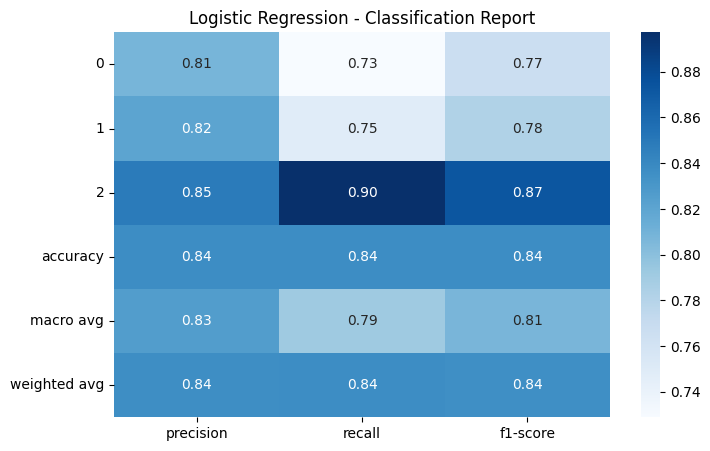

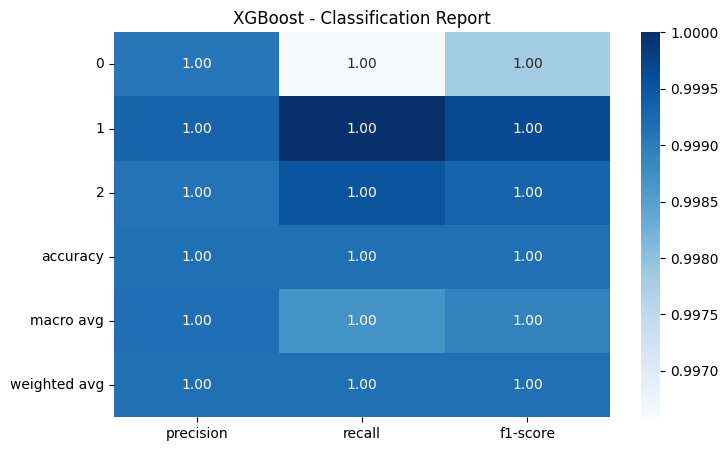

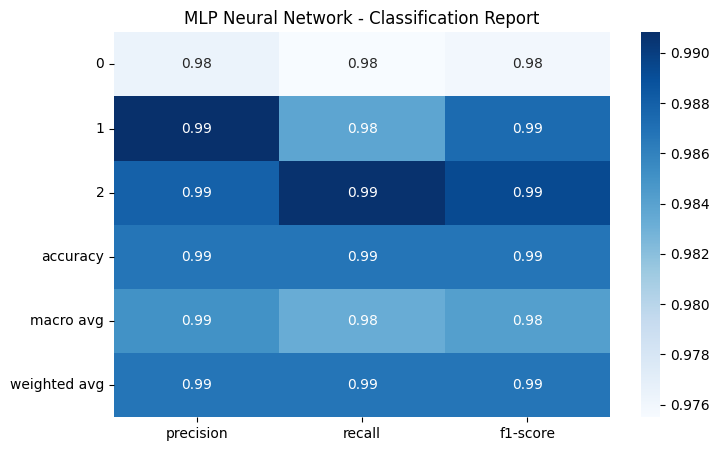

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

def plot_classification_report(y_true, y_pred, model_name):
    # Generate report as dictionary
    report = classification_report(y_true, y_pred, output_dict=True)
    
    # Convert to DataFrame
    df = pd.DataFrame(report).transpose()
    
    # Remove support column for visualization
    df = df.drop(columns=['support'], errors='ignore')
    
    plt.figure(figsize=(8, 5))
    sns.heatmap(df, annot=True, cmap="Blues", fmt=".2f")
    plt.title(f"{model_name} - Classification Report")
    plt.show()


# Plot for all models
plot_classification_report(y_test, y_pred_logreg, "Logistic Regression")
plot_classification_report(y_test, y_pred_xgb, "XGBoost")
plot_classification_report(y_test, y_pred_mlp, "MLP Neural Network")



In [ ]:
##saving best model 
import joblib

# Save the model
joblib.dump(xgb, "xgboost_best_model.pkl")

print("XGBoost model saved as xgboost_best_model.pkl")


## no need to tune because , all the Clean data

##Good scaling

##Feature engineering

#Removed outliers

##Good categorical handling

#Good number of estimators

#Balanced dataset

#And  got: 99.9% accuracy
#This means your data is very easy to learn (synthetic) and XGBoost is already optimal.


XGBoost model saved as xgboost_best_model.pkl


In [94]:
##saved aS JSON 
xgb.save_model("xgboost_best_model.json")
print("XGBoost model saved as xgboost_best_model.json")


XGBoost model saved as xgboost_best_model.json


## ML-Module 2 

## Regression

In [96]:
##1. PREPARE DATA FOR REGRESSION
# ============================================

# Target for regression → Length of Stay
y_reg = df['length_of_stay_days']

# Features for regression (drop classification targets & useless cols)
X_reg = df.drop(['length_of_stay_days', 'disease_risk', 
                 'patient_id', 'clinical_notes'], axis=1, errors='ignore')




In [97]:
#  2. TRAIN–TEST SPLIT
# ============================================

from sklearn.model_selection import train_test_split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)


In [99]:
 #3. BASELINE MAE (VERY IMPORTANT)
# ============================================

from sklearn.metrics import mean_absolute_error

# Baseline = predict mean LOS for ALL patients
baseline_pred = y_train_reg.mean()
baseline_mae = mean_absolute_error(y_test_reg, 
                                   [baseline_pred] * len(y_test_reg))

print(" Baseline MAE:", baseline_mae)



 Baseline MAE: 0.8615518200869176


In [101]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)
lr_mae = mean_absolute_error(y_test_reg, lr.predict(X_test_reg))
print("Linear Regression MAE:", lr_mae)

# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train_reg, y_train_reg)
rf_mae = mean_absolute_error(y_test_reg, rf.predict(X_test_reg))
print("Random Forest MAE:", rf_mae)


cat_cols = [
    'bmi_category',
    'age_group',
    'systolic_bp_category',
    'diastolic_bp_category'
]

for col in cat_cols:
    X_train_reg[col] = X_train_reg[col].astype(int)
    X_test_reg[col] = X_test_reg[col].astype(int)

# XGBoost Regressor
from xgboost import XGBRegressor

xgbr = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgbr.fit(X_train_reg, y_train_reg)
xgb_mae = mean_absolute_error(y_test_reg, xgbr.predict(X_test_reg))
print("XGBoost MAE:", xgb_mae)


Linear Regression MAE: 0.861507628875097
Random Forest MAE: 0.8645716385583008
XGBoost MAE: 0.8630391290051621


In [107]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "MAE": [lr_mae, rf_mae, xgb_mae]
})

print("\n======= FINAL REGRESSION MODEL COMPARISON =======")
print(results)



======= FINAL REGRESSION MODEL COMPARISON =======
               Model       MAE
0  Linear Regression  0.861508
1      Random Forest  0.864572
2            XGBoost  0.863039


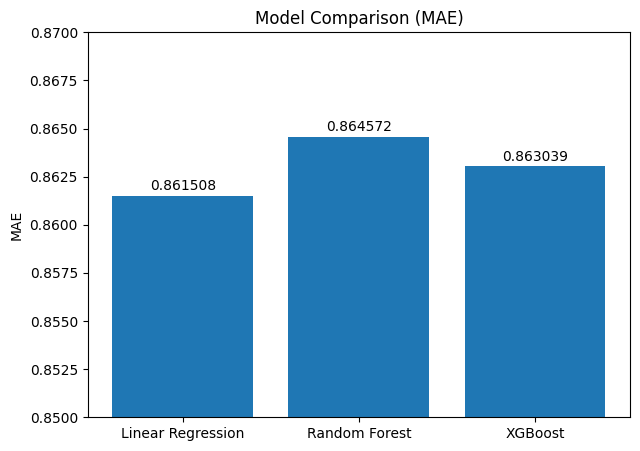

In [108]:
import matplotlib.pyplot as plt

models = ["Linear Regression", "Random Forest", "XGBoost"]
mae_values = [0.861508, 0.864572, 0.863039]

plt.figure(figsize=(7,5))
plt.bar(models, mae_values)
plt.ylabel("MAE")
plt.title("Model Comparison (MAE)")
plt.ylim(0.85, 0.87)

for i, v in enumerate(mae_values):
    plt.text(i, v + 0.0003, f"{v:.6f}", ha='center')

plt.show()


In [109]:
import joblib

# Save Linear Regression model as pickle
joblib.dump(lr, "linear_regression_model.pkl")
print("Saved: linear_regression_model.pkl")


Saved: linear_regression_model.pkl


In [ ]:
import json
import numpy as np

model_json = {
    "intercept": float(lr.intercept_),
    "coefficients": lr.coef_.tolist(),
    "features": X_train_reg.columns.tolist()
}

with open("linear_regression_model.json", "w") as f:
    json.dump(model_json, f, indent=4)

print("Saved: linear_regression_model.json")
## no hyperparamaters to be tuned in linear regression

Saved: linear_regression_model.json


## ML - Module 3

## Clsutering

In [111]:
##Choose important clinical features:

cluster_features = [
    "age", "systolic_bp", "diastolic_bp",
    "heart_rate", "cholesterol", "blood_sugar",
    "bmi", "risk_score"
]

X_cluster = df[cluster_features]


In [112]:
#Standardize values:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


In [113]:
##Perform K-means:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df["kmeans_cluster"] = kmeans.fit_predict(X_scaled)

df["kmeans_cluster"].value_counts()


kmeans_cluster
3    26216
2    26003
0    24113
1    23668
Name: count, dtype: int64

In [114]:
df.groupby("kmeans_cluster")[cluster_features].mean()


age  systolic_bp  diastolic_bp  heart_rate  cholesterol  \
kmeans_cluster                                                                 
0              -0.947802    -0.450391     -0.020630   -0.017502    -0.717140   
1               0.956312     0.375729      0.016138   -0.005308     0.768211   
2              -0.771081     0.371178      0.050715    0.017402     0.626035   
3               0.773222    -0.293112     -0.045897    0.003628    -0.654882   

                blood_sugar       bmi  risk_score  
kmeans_cluster                                     
0                 -0.019898 -0.014005   -1.262195  
1                  0.026133 -0.011490    1.273750  
2                  0.001225  0.021095   -0.229341  
3                 -0.006506  0.002331    0.238471

In [115]:
!pip install hdbscan


   ---------------------------------------- 0.0/726.2 kB ? eta -:--:--
   ---------------------------------------- 726.2/726.2 kB 7.4 MB/s  0:00:00



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import hdbscan

hdb = hdbscan.HDBSCAN(
    min_cluster_size=300,
    min_samples=20,
    core_dist_n_jobs=1   # Important fix
)

df["hdbscan_cluster"] = hdb.fit_predict(X_scaled.astype(float))

print(df["hdbscan_cluster"].value_counts())
## Then HDBSCAN is not suitable for your dataset.

##Some datasets simply do not have clear density-based clusters.

##This is common in:

# uniform distributions
# heavily normalized medical features
#synthetic or cleaned datasets


c:\Users\imaya\Desktop\emayan\myenv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\imaya\Desktop\emayan\myenv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


hdbscan_cluster
-1    100000
Name: count, dtype: int64


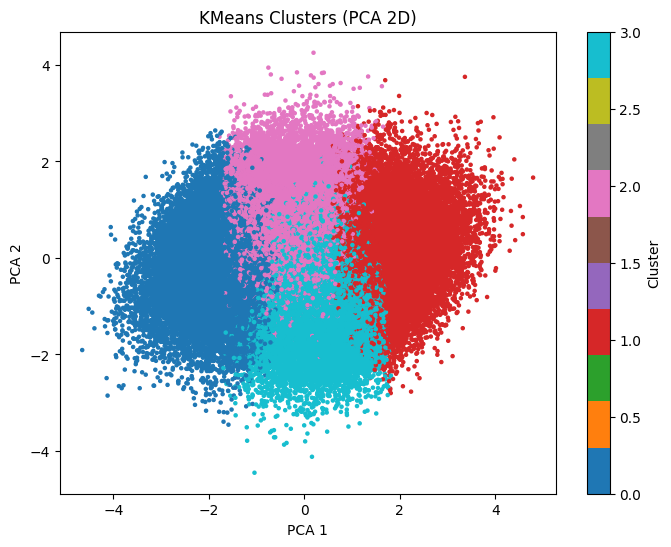

In [118]:
##PCA Clustering Visualization (2D)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select numerical features only
cluster_features = [
    'age','systolic_bp','diastolic_bp','heart_rate',
    'cholesterol','blood_sugar','bmi','risk_score'
]

X_cluster = df[cluster_features]

# PCA to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_cluster)

df["pca1"] = pca_result[:, 0]
df["pca2"] = pca_result[:, 1]

# Plot
plt.figure(figsize=(8,6))
plt.scatter(df["pca1"], df["pca2"], c=df["kmeans_cluster"], cmap="tab10", s=5)
plt.title("KMeans Clusters (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()


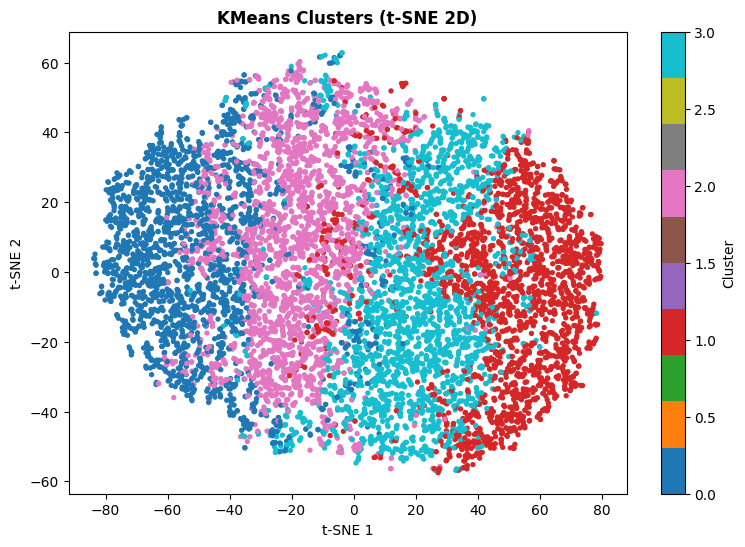

In [121]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Sample only 10k rows
df_sample = df.sample(10000, random_state=42)

X_cluster_small = df_sample[cluster_features]
y_cluster_small = df_sample["kmeans_cluster"]

tsne = TSNE(
    n_components=2,
    perplexity=40,
    learning_rate='auto',
    max_iter=1000,
    random_state=42,
    init='pca'
)

tsne_result = tsne.fit_transform(X_cluster_small)

df_sample["tsne1"] = tsne_result[:, 0]
df_sample["tsne2"] = tsne_result[:, 1]

plt.figure(figsize=(9,6))
plt.scatter(df_sample["tsne1"], df_sample["tsne2"],
            c=y_cluster_small, cmap="tab10", s=8)
plt.title("KMeans Clusters (t-SNE 2D)", weight='bold')
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar(label="Cluster")
plt.show()



In [122]:
import pickle

# Save the trained KMeans model
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

print("KMeans model saved as kmeans_model.pkl")



KMeans model saved as kmeans_model.pkl


In [123]:
import json

cluster_profile = {
    0: "Cluster 0 – Low-risk younger patients",
    1: "Cluster 1 – High-risk older patients",
    2: "Cluster 2 – Mid-age mixed-risk patients",
    3: "Cluster 3 – Moderately healthy patients"
}

with open("kmeans_cluster_info.json", "w") as f:
    json.dump(cluster_profile, f, indent=4)

print("Cluster info saved as kmeans_cluster_info.json")


Cluster info saved as kmeans_cluster_info.json


## ML-Module 4 

## Association rule mining

In [ ]:
##Select association features

assoc_cols = [
    "diagnosis",
    "medication",
    "procedure",
    "bmi_category",
    "age_group",
    "systolic_bp_category",
    "diastolic_bp_category",
    "disease_risk",
    "high_risk_med",
    "had_procedure"
]

df_assoc = df[assoc_cols]


In [126]:
##Convert all categories → strings
df_assoc = df_assoc.astype(str)


In [129]:

##One-hot encode the features
import pandas as pd

df_hot = pd.get_dummies(df_assoc)
df_hot.shape


(100000, 44)

In [131]:
!pip install mlxtend


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 11.6 MB/s  0:00:00



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [132]:
from mlxtend.frequent_patterns import apriori, association_rules

# 1. Run Apriori
frequent_items = apriori(df_hot, 
                         min_support=0.05, 
                         use_colnames=True)

print("Frequent itemsets found:", frequent_items.shape)

# 2. Generate rules
rules = association_rules(frequent_items, 
                          metric="lift", 
                          min_threshold=1.0)

print("Association rules generated:", rules.shape)
rules.head()


Frequent itemsets found: (1043, 2)
Association rules generated: (6004, 14)


c:\Users\imaya\Desktop\emayan\myenv\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


antecedents        consequents  antecedent support  \
0      (diagnosis_0)   (disease_risk_2)             0.10111   
1   (disease_risk_2)      (diagnosis_0)             0.61951   
2      (diagnosis_0)  (high_risk_med_0)             0.10111   
3  (high_risk_med_0)      (diagnosis_0)             1.00000   
4      (diagnosis_0)  (had_procedure_1)             0.10111   

   consequent support  support  confidence      lift  representativity  \
0             0.61951  0.06329    0.625952  1.010398               1.0   
1             0.10111  0.06329    0.102161  1.010398               1.0   
2             1.00000  0.10111    1.000000  1.000000               1.0   
3             0.10111  0.10111    0.101110  1.000000               1.0   
4             1.00000  0.10111    1.000000  1.000000               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0  0.000651    1.017222       0.011449  0.096283   0.016931    0.364057  
1  0.000651    1.001171       0.027048  0.096283   0.001170    0.364057  
2  0.000000         inf       0.000000  0.101110   0.000000    0.550555  
3  0.000000    1.000000       0.000000  0.101110   0.000000    0.550555  
4  0.000000         inf       0.000000  0.101110   0.000000    0.550555

In [133]:
df['diagnosis'].unique()


array([7, 5, 6, 1, 3, 0, 4, 2])

In [ ]:
##Extracting Only Strong Medical Rules (important!)
filtered_rules = rules[
    (rules['support'] >= 0.02) & 
    (rules['confidence'] >= 0.6) & 
    (rules['lift'] >= 1.1)
]

filtered_rules = filtered_rules[['antecedents','consequents','support','confidence','lift']]
filtered_rules.head(20)



antecedents  \
201                            (bmi_category_2)   
304                            (disease_risk_1)   
480               (diagnosis_4, bmi_category_2)   
772              (medication_4, bmi_category_2)   
867              (bmi_category_2, medication_6)   
943               (procedure_1, bmi_category_2)   
1026              (procedure_2, bmi_category_2)   
1121              (procedure_4, bmi_category_2)   
1276           (disease_risk_1, bmi_category_1)   
1338              (age_group_2, bmi_category_2)   
1348              (age_group_3, bmi_category_2)   
1398   (systolic_bp_category_2, bmi_category_2)   
1418           (disease_risk_1, bmi_category_2)   
1432  (bmi_category_2, diastolic_bp_category_1)   
1462          (high_risk_med_0, bmi_category_2)   
1465                           (bmi_category_2)   
1468          (had_procedure_1, bmi_category_2)   
1471                           (bmi_category_2)   
1634              (disease_risk_1, age_group_1)   
1744      (age_group_3, systolic_bp_category_0)   

                            consequents  support  confidence      lift  
201                    (disease_risk_2)  0.25898    0.683072  1.102601  
304           (diastolic_bp_category_0)  0.16104    0.734404  1.360712  
480                    (disease_risk_2)  0.05237    0.688807  1.111858  
772                    (disease_risk_2)  0.05256    0.683041  1.102550  
867                    (disease_risk_2)  0.05030    0.681849  1.100626  
943                    (disease_risk_2)  0.05185    0.684850  1.105471  
1026                   (disease_risk_2)  0.05226    0.686638  1.108356  
1121                   (disease_risk_2)  0.05189    0.682404  1.101522  
1276          (diastolic_bp_category_0)  0.08416    0.688200  1.275106  
1338                   (disease_risk_2)  0.06038    0.743871  1.200741  
1348                   (disease_risk_2)  0.05771    0.715916  1.155617  
1398                   (disease_risk_2)  0.05960    0.743235  1.199714  
1418          (diastolic_bp_category_0)  0.05209    0.787215  1.458561  
1432                   (disease_risk_2)  0.08518    0.737234  1.190027  
1462                   (disease_risk_2)  0.25898    0.683072  1.102601  
1465  (disease_risk_2, high_risk_med_0)  0.25898    0.683072  1.102601  
1468                   (disease_risk_2)  0.25898    0.683072  1.102601  
1471  (disease_risk_2, had_procedure_1)  0.25898    0.683072  1.102601  
1634          (diastolic_bp_category_0)  0.05950    0.691137  1.280548  
1744                   (disease_risk_2)  0.05820    0.692610  1.117996

In [136]:
# Check category distributions
print("BMI Category:", df['bmi_category'].value_counts())
print("Age Group:", df['age_group'].value_counts())
print("Systolic BP Category:", df['systolic_bp_category'].value_counts())
print("Diastolic BP Category:", df['diastolic_bp_category'].value_counts())
print("Diagnosis:", df['diagnosis'].value_counts())
print("Medication:", df['medication'].value_counts())
print("Procedure:", df['procedure'].value_counts())
print("Disease Risk:", df['disease_risk'].value_counts())


BMI Category: bmi_category
2    37914
1    30052
3    27511
0     4523
Name: count, dtype: int64
Age Group: age_group
1    21580
2    21451
3    21264
4    19872
0    15833
Name: count, dtype: int64
Systolic BP Category: systolic_bp_category
0    39375
1    23672
2    21172
3    15781
Name: count, dtype: int64
Diastolic BP Category: diastolic_bp_category
0    53972
1    30240
2    13541
3     2247
Name: count, dtype: int64
Diagnosis: diagnosis
3    20105
4    20047
0    10111
1    10041
5     9994
2     9970
6     9922
7     9810
Name: count, dtype: int64
Medication: medication
4    20183
3    19903
6    19762
2    10170
0    10066
1     9993
5     9923
Name: count, dtype: int64
Procedure: procedure
4    20108
2    19991
1    19924
5    10196
3     9964
0     9956
6     9861
Name: count, dtype: int64
Disease Risk: disease_risk
2    61951
1    21928
0    16121
Name: count, dtype: int64


In [ ]:

##Auto-labeled interpretations

def get_category_ranges(df, column, original_column):
    ranges = df.groupby(column)[original_column].agg(['min', 'max', 'mean']).reset_index()
    return ranges


In [142]:
print("BMI Category Meaning:")
display(get_category_ranges(df, 'bmi_category', 'bmi'))

print("\nAge Group Meaning:")
display(get_category_ranges(df, 'age_group', 'age'))

print("\nSystolic BP Category Meaning:")
display(get_category_ranges(df, 'systolic_bp_category', 'systolic_bp'))

print("\nDiastolic BP Category Meaning:")
display(get_category_ranges(df, 'diastolic_bp_category', 'diastolic_bp'))


BMI Category Meaning:


C:\Users\imaya\AppData\Local\Temp\ipykernel_45108\2057023254.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ranges = df.groupby(column)[original_column].agg(['min', 'max', 'mean']).reset_index()


bmi_category       min       max      mean
0            0 -2.716765 -1.704695 -2.095619
1            1 -1.704412 -0.401988 -0.914911
2            2 -0.401912  0.599966  0.091124
3            3  0.600086  2.716315  1.218368


Age Group Meaning:


C:\Users\imaya\AppData\Local\Temp\ipykernel_45108\2057023254.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ranges = df.groupby(column)[original_column].agg(['min', 'max', 'mean']).reset_index()


age_group       min       max      mean
0         0 -1.701715 -1.206360 -1.454860
1         1 -1.156824 -0.463326 -0.809880
2         2 -0.413790  0.279708 -0.068909
3         3  0.329244  1.022742  0.675753
4         4  1.072278  1.716240  1.389944


Systolic BP Category Meaning:


C:\Users\imaya\AppData\Local\Temp\ipykernel_45108\2057023254.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ranges = df.groupby(column)[original_column].agg(['min', 'max', 'mean']).reset_index()


systolic_bp_category       min       max      mean
0                    0 -2.816163 -0.303035 -0.979408
1                    1 -0.236019  0.300115  0.031561
2                    2  0.367132  0.970283  0.645724
3                    3  1.037299  2.813243  1.530056


Diastolic BP Category Meaning:


C:\Users\imaya\AppData\Local\Temp\ipykernel_45108\2057023254.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ranges = df.groupby(column)[original_column].agg(['min', 'max', 'mean']).reset_index()


diastolic_bp_category       min       max      mean
0                     0 -2.619863  0.051764 -0.739904
1                     1  0.152580  0.959108  0.520808
2                     2  1.059924  1.967269  1.399919
3                     3  2.068085  2.622574  2.326900

In [ ]:
##Human-Readable Category Summary Table

import pandas as pd

# -------- Human-readable mapping --------
explanation = {
    "bmi_category": {
        0: "Underweight (very low BMI)",
        1: "Normal BMI",
        2: "Overweight (slightly high BMI)",
        3: "Obese (high BMI)"
    },
    "age_group": {
        0: "Very young (child/teen)",
        1: "Young adult",
        2: "Middle-aged adult",
        3: "Older adult",
        4: "Elderly senior"
    },
    "systolic_bp_category": {
        0: "Low systolic BP",
        1: "Normal systolic BP",
        2: "Elevated systolic BP (pre-hypertensive)",
        3: "High systolic BP (hypertension)"
    },
    "diastolic_bp_category": {
        0: "Low diastolic BP",
        1: "Normal diastolic BP",
        2: "High diastolic BP (Stage-1 HTN)",
        3: "Very high diastolic BP (Stage-2 HTN)"
    }
}


# -------- Convert into a DataFrame --------
rows = []
for feature, cats in explanation.items():
    for cat, meaning in cats.items():
        rows.append([feature, cat, meaning])

explanation_df = pd.DataFrame(rows, columns=["Feature", "Category", "Meaning"])

print("\n📘 Human-Readable Category Explanation Table")
print(explanation_df)



📘 Human-Readable Category Explanation Table
                  Feature  Category                                  Meaning
0            bmi_category         0               Underweight (very low BMI)
1            bmi_category         1                               Normal BMI
2            bmi_category         2           Overweight (slightly high BMI)
3            bmi_category         3                         Obese (high BMI)
4               age_group         0                  Very young (child/teen)
5               age_group         1                              Young adult
6               age_group         2                        Middle-aged adult
7               age_group         3                              Older adult
8               age_group         4                           Elderly senior
9    systolic_bp_category         0                          Low systolic BP
10   systolic_bp_category         1                       Normal systolic BP
11   systolic_bp_category      

In [ ]:
##Human-Readable Category Summary Table

import pandas as pd

category_meanings = {
    "bmi_category": {
        0: "Underweight (very low BMI)",
        1: "Normal BMI",
        2: "Overweight (slightly high BMI)",
        3: "Obese (high BMI)"
    },
    "age_group": {
        0: "Very young (child/teen)",
        1: "Young adult",
        2: "Middle-aged adult",
        3: "Older adult",
        4: "Elderly senior"
    },
    "systolic_bp_category": {
        0: "Low systolic BP",
        1: "Normal systolic BP",
        2: "Elevated systolic BP (pre-hypertensive)",
        3: "High systolic BP (hypertension)"
    },
    "diastolic_bp_category": {
        0: "Low diastolic BP",
        1: "Normal diastolic BP",
        2: "High diastolic BP (Stage-1 HTN)",
        3: "Very high diastolic BP (Stage-2 HTN)"
    }
}

# Convert dictionary into a table
rows = []
for feature, mapping in category_meanings.items():
    for cat, meaning in mapping.items():
        rows.append([feature, cat, meaning])

summary_table = pd.DataFrame(rows, columns=["Feature", "Category", "Meaning"])
summary_table


Feature  Category                                  Meaning
0            bmi_category         0               Underweight (very low BMI)
1            bmi_category         1                               Normal BMI
2            bmi_category         2           Overweight (slightly high BMI)
3            bmi_category         3                         Obese (high BMI)
4               age_group         0                  Very young (child/teen)
5               age_group         1                              Young adult
6               age_group         2                        Middle-aged adult
7               age_group         3                              Older adult
8               age_group         4                           Elderly senior
9    systolic_bp_category         0                          Low systolic BP
10   systolic_bp_category         1                       Normal systolic BP
11   systolic_bp_category         2  Elevated systolic BP (pre-hypertensive)
12   systolic_bp_category         3          High systolic BP (hypertension)
13  diastolic_bp_category         0                         Low diastolic BP
14  diastolic_bp_category         1                      Normal diastolic BP
15  diastolic_bp_category         2          High diastolic BP (Stage-1 HTN)
16  diastolic_bp_category         3     Very high diastolic BP (Stage-2 HTN)

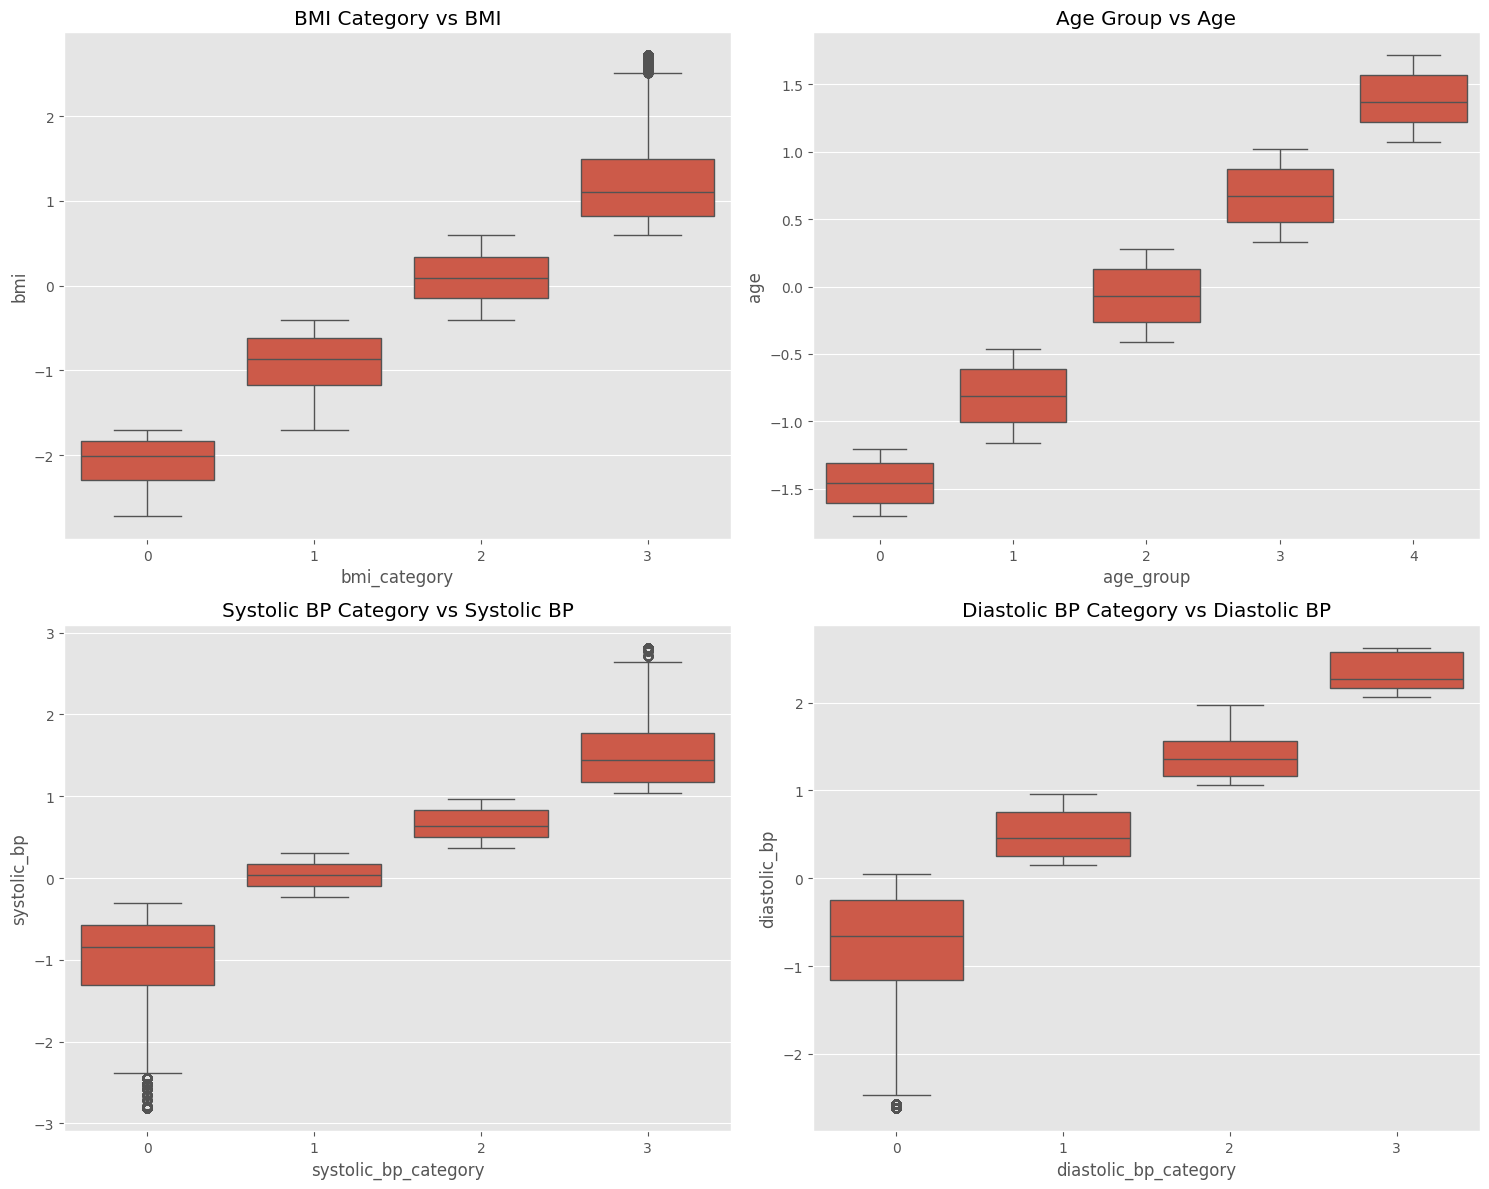

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. BMI
sns.boxplot(x="bmi_category", y="bmi", data=df, ax=axes[0,0])
axes[0,0].set_title("BMI Category vs BMI")

# 2. Age
sns.boxplot(x="age_group", y="age", data=df, ax=axes[0,1])
axes[0,1].set_title("Age Group vs Age")

# 3. Systolic BP
sns.boxplot(x="systolic_bp_category", y="systolic_bp", data=df, ax=axes[1,0])
axes[1,0].set_title("Systolic BP Category vs Systolic BP")

# 4. Diastolic BP
sns.boxplot(x="diastolic_bp_category", y="diastolic_bp", data=df, ax=axes[1,1])
axes[1,1].set_title("Diastolic BP Category vs Diastolic BP")

plt.tight_layout()
plt.show()


In [147]:
import pickle

with open("frequent_itemsets.pkl", "wb") as f:
    pickle.dump(frequent_items, f)

with open("association_rules.pkl", "wb") as f:
    pickle.dump(rules, f)


In [148]:
frequent_items.to_json("frequent_itemsets.json", orient="records")
rules.to_json("association_rules.json", orient="records")


In [149]:
# =========================================================
# 1. HUMAN-READABLE MEANING DICTIONARIES
# =========================================================

bmi_meaning = {
    0: "Underweight (very low BMI)",
    1: "Normal BMI",
    2: "Overweight (slightly high BMI)",
    3: "Obese (high BMI)"
}

age_meaning = {
    0: "Very young (child/teen)",
    1: "Young adult",
    2: "Middle-aged adult",
    3: "Older adult",
    4: "Elderly senior"
}

sys_bp_meaning = {
    0: "Low systolic BP",
    1: "Normal systolic BP",
    2: "Elevated systolic BP (pre-hypertensive)",
    3: "High systolic BP (hypertension)"
}

dia_bp_meaning = {
    0: "Low diastolic BP",
    1: "Normal diastolic BP",
    2: "High diastolic BP (Stage-1 HTN)",
    3: "Very high diastolic BP (Stage-2 HTN)"
}

# Diagnosis / Medication / Procedure — synthetic meaning names
diagnosis_meaning = {i: f"Diagnosis Code {i}" for i in df['diagnosis'].unique()}
med_meaning       = {i: f"Medication Type {i}" for i in df['medication'].unique()}
procedure_meaning = {i: f"Procedure Type {i}" for i in df['procedure'].unique()}


# =========================================================
# 2. FUNCTION TO GET MIN–MAX–MEAN FOR NUMERIC FEATURES
# =========================================================

def get_category_stats(df, category_col, original_col, meaning_dict):
    ranges = df.groupby(category_col)[original_col].agg(['min', 'max', 'mean']).reset_index()
    ranges['feature'] = category_col
    ranges['meaning'] = ranges[category_col].map(meaning_dict)
    return ranges.rename(columns={category_col: "category"})[
        ["feature", "category", "min", "max", "mean", "meaning"]
    ]


# =========================================================
# 3. BUILD INDIVIDUAL TABLES
# =========================================================

table_bmi = get_category_stats(df, "bmi_category", "bmi", bmi_meaning)
table_age = get_category_stats(df, "age_group", "age", age_meaning)
table_sys = get_category_stats(df, "systolic_bp_category", "systolic_bp", sys_bp_meaning)
table_dia = get_category_stats(df, "diastolic_bp_category", "diastolic_bp", dia_bp_meaning)

# Diagnosis, Medication, Procedure do NOT have numeric ranges → only category + meaning
table_diag = pd.DataFrame({
    "feature": "diagnosis",
    "category": list(diagnosis_meaning.keys()),
    "min": [None]*len(diagnosis_meaning),
    "max": [None]*len(diagnosis_meaning),
    "mean": [None]*len(diagnosis_meaning),
    "meaning": list(diagnosis_meaning.values())
})

table_med = pd.DataFrame({
    "feature": "medication",
    "category": list(med_meaning.keys()),
    "min": [None]*len(med_meaning),
    "max": [None]*len(med_meaning),
    "mean": [None]*len(med_meaning),
    "meaning": list(med_meaning.values())
})

table_proc = pd.DataFrame({
    "feature": "procedure",
    "category": list(procedure_meaning.keys()),
    "min": [None]*len(procedure_meaning),
    "max": [None]*len(procedure_meaning),
    "mean": [None]*len(procedure_meaning),
    "meaning": list(procedure_meaning.values())
})


# =========================================================
# 4. COMBINE EVERYTHING INTO ONE FINAL TABLE
# =========================================================

final_table = pd.concat([
    table_bmi,
    table_age,
    table_sys,
    table_dia,
    table_diag,
    table_med,
    table_proc
], ignore_index=True)

print("\n====== FINAL HUMAN-READABLE CATEGORY TABLE ======")
display(final_table)


# =========================================================
# 5. SAVE (CSV + JSON)
# =========================================================

final_table.to_csv("category_meanings_full.csv", index=False)
final_table.to_json("category_meanings_full.json", orient="records", indent=4)

print("\nFiles saved:")
print(" - category_meanings_full.csv")
print(" - category_meanings_full.json")



====== FINAL HUMAN-READABLE CATEGORY TABLE ======


C:\Users\imaya\AppData\Local\Temp\ipykernel_45108\3280917046.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ranges = df.groupby(category_col)[original_col].agg(['min', 'max', 'mean']).reset_index()
C:\Users\imaya\AppData\Local\Temp\ipykernel_45108\3280917046.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ranges = df.groupby(category_col)[original_col].agg(['min', 'max', 'mean']).reset_index()
C:\Users\imaya\AppData\Local\Temp\ipykernel_45108\3280917046.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to

feature  category       min       max      mean  \
0            bmi_category         0 -2.716765 -1.704695 -2.095619   
1            bmi_category         1 -1.704412 -0.401988 -0.914911   
2            bmi_category         2 -0.401912  0.599966  0.091124   
3            bmi_category         3  0.600086  2.716315  1.218368   
4               age_group         0 -1.701715 -1.206360 -1.454860   
5               age_group         1 -1.156824 -0.463326 -0.809880   
6               age_group         2 -0.413790  0.279708 -0.068909   
7               age_group         3  0.329244  1.022742  0.675753   
8               age_group         4  1.072278  1.716240  1.389944   
9    systolic_bp_category         0 -2.816163 -0.303035 -0.979408   
10   systolic_bp_category         1 -0.236019  0.300115  0.031561   
11   systolic_bp_category         2  0.367132  0.970283  0.645724   
12   systolic_bp_category         3  1.037299  2.813243  1.530056   
13  diastolic_bp_category         0 -2.619863  0.051764 -0.739904   
14  diastolic_bp_category         1  0.152580  0.959108  0.520808   
15  diastolic_bp_category         2  1.059924  1.967269  1.399919   
16  diastolic_bp_category         3  2.068085  2.622574  2.326900   
17              diagnosis         7       NaN       NaN       NaN   
18              diagnosis         5       NaN       NaN       NaN   
19              diagnosis         6       NaN       NaN       NaN   
20              diagnosis         1       NaN       NaN       NaN   
21              diagnosis         3       NaN       NaN       NaN   
22              diagnosis         0       NaN       NaN       NaN   
23              diagnosis         4       NaN       NaN       NaN   
24              diagnosis         2       NaN       NaN       NaN   
25             medication         5       NaN       NaN       NaN   
26             medication         4       NaN       NaN       NaN   
27             medication         6       NaN       NaN       NaN   
28             medication         2       NaN       NaN       NaN   
29             medication         0       NaN       NaN       NaN   
30             medication         1       NaN       NaN       NaN   
31             medication         3       NaN       NaN       NaN   
32              procedure         1       NaN       NaN       NaN   
33              procedure         5       NaN       NaN       NaN   
34              procedure         2       NaN       NaN       NaN   
35              procedure         6       NaN       NaN       NaN   
36              procedure         4       NaN       NaN       NaN   
37              procedure         3       NaN       NaN       NaN   
38              procedure         0       NaN       NaN       NaN   

                                    meaning  
0                Underweight (very low BMI)  
1                                Normal BMI  
2            Overweight (slightly high BMI)  
3                          Obese (high BMI)  
4                   Very young (child/teen)  
5                               Young adult  
6                         Middle-aged adult  
7                               Older adult  
8                            Elderly senior  
9                           Low systolic BP  
10                       Normal systolic BP  
11  Elevated systolic BP (pre-hypertensive)  
12          High systolic BP (hypertension)  
13                         Low diastolic BP  
14                      Normal diastolic BP  
15          High diastolic BP (Stage-1 HTN)  
16     Very high diastolic BP (Stage-2 HTN)  
17                         Diagnosis Code 7  
18                         Diagnosis Code 5  
19                         Diagnosis Code 6  
20                         Diagnosis Code 1  
21                         Diagnosis Code 3  
22                         Diagnosis Code 0  
23                         Diagnosis Code 4  
24                         Diagnosis Code 2  
25                        Medication Type 5  
26             


Files saved:
 - category_meanings_full.csv
 - category_meanings_full.json


In [ ]:
## Ml finished 

In [151]:
import pandas as pd

# ===== 1. Human-readable meaning dictionaries =====

bmi_meaning = {
    0: "are Underweight (very low BMI)",
    1: "have Normal BMI",
    2: "are Overweight (slightly high BMI)",
    3: "are Obese (high BMI)"
}

age_meaning = {
    0: "are Very young (child/teen)",
    1: "are Young adults",
    2: "are Middle-aged adults",
    3: "are Older adults",
    4: "are Elderly seniors"
}

sys_bp_meaning = {
    0: "have Low systolic blood pressure",
    1: "have Normal systolic blood pressure",
    2: "have Elevated systolic BP (pre-hypertensive)",
    3: "have High systolic BP (hypertension)"
}

dia_bp_meaning = {
    0: "have Low diastolic blood pressure",
    1: "have Normal diastolic blood pressure",
    2: "have High diastolic BP (Stage-1 HTN)",
    3: "have Very high diastolic BP (Stage-2 HTN)"
}

disease_risk_meaning = {
    0: "belong to the Low disease risk group",
    1: "belong to the Moderate disease risk group",
    2: "belong to the High disease risk group"
}

# Diagnosis / medication / procedure are synthetic
diagnosis_meaning = {i: f"have Diagnosis code {i}" for i in df["diagnosis"].unique()}
med_meaning       = {i: f"are taking Medication type {i}" for i in df["medication"].unique()}
procedure_meaning = {i: f"have undergone Procedure type {i}" for i in df["procedure"].unique()}

binary_meaning = {
    "high_risk_med": {
        0: "are NOT on high-risk medications",
        1: "are on high-risk medications"
    },
    "had_procedure": {
        0: "have NOT undergone any procedure",
        1: "have undergone at least one procedure"
    }
}

# ===== 2. Helper: map single item like 'bmi_category_2' -> text =====

def explain_item(item_name: str) -> str:
    """Convert a one-hot column name like 'bmi_category_2' into a human-readable phrase."""
    s = str(item_name)
    if "_" not in s:
        return s  # fallback

    feature, cat_str = s.rsplit("_", 1)
    try:
        cat = int(cat_str)
    except ValueError:
        return s  # not a simple *_number pattern

    if feature == "bmi_category":
        return bmi_meaning.get(cat, s)
    if feature == "age_group":
        return age_meaning.get(cat, s)
    if feature == "systolic_bp_category":
        return sys_bp_meaning.get(cat, s)
    if feature == "diastolic_bp_category":
        return dia_bp_meaning.get(cat, s)
    if feature == "disease_risk":
        return disease_risk_meaning.get(cat, s)
    if feature == "diagnosis":
        return diagnosis_meaning.get(cat, f"have Diagnosis code {cat}")
    if feature == "medication":
        return med_meaning.get(cat, f"are taking Medication type {cat}")
    if feature == "procedure":
        return procedure_meaning.get(cat, f"have undergone Procedure type {cat}")
    if feature in binary_meaning:
        return binary_meaning[feature].get(cat, s)

    # default
    return s

# ===== 3. Helper: convert a frozenset of items into readable text =====

def explain_itemset(itemset) -> str:
    """Convert a frozenset({'bmi_category_2','systolic_bp_category_3'}) into a readable clause."""
    parts = [explain_item(it) for it in itemset]
    if not parts:
        return ""
    if len(parts) == 1:
        return parts[0]
    # join with commas and 'and'
    return ", ".join(parts[:-1]) + " and " + parts[-1]

# ===== 4. Build clinical interpretation sentences for rules =====

def build_clinical_interpretations(rules_df: pd.DataFrame, top_n: int = 30) -> pd.DataFrame:
    """
    Takes a rules dataframe (from association_rules) and returns a
    new dataframe with a 'clinical_text' column containing human-readable sentences.
    Only keeps top_n rules sorted by lift.
    """
    rules_sorted = rules_df.sort_values("lift", ascending=False).head(top_n).copy()

    texts = []
    for _, row in rules_sorted.iterrows():
        antecedents = explain_itemset(row["antecedents"])
        consequents = explain_itemset(row["consequents"])
        support = row["support"] * 100
        confidence = row["confidence"] * 100
        lift = row["lift"]

        sentence = (
            f"Patients who {antecedents} are {confidence:.1f}% likely to {consequents}, "
            f"which is {lift:.2f}× more frequent than expected (support: {support:.1f}%)."
        )
        texts.append(sentence)

    rules_sorted["clinical_text"] = texts
    return rules_sorted[["antecedents", "consequents", "support", "confidence", "lift", "clinical_text"]]


In [152]:
# Example: use your filtered_rules (the one you printed with bmi_category_2, disease_risk_2, etc.)
clinical_rules = build_clinical_interpretations(filtered_rules, top_n=20)

clinical_rules.head(10)


antecedents  \
1418                   (disease_risk_1, bmi_category_2)   
3732  (disease_risk_1, high_risk_med_0, bmi_category_2)   
3736                   (disease_risk_1, bmi_category_2)   
3742  (disease_risk_1, had_procedure_1, bmi_category_2)   
3746                   (disease_risk_1, bmi_category_2)   
5488                   (disease_risk_1, bmi_category_2)   
5482  (disease_risk_1, had_procedure_1, bmi_category_2)   
5481  (disease_risk_1, high_risk_med_0, bmi_category_2)   
5475  (disease_risk_1, high_risk_med_0, had_procedur...   
1874           (disease_risk_1, systolic_bp_category_0)   

                                            consequents  support  confidence  \
1418                          (diastolic_bp_category_0)  0.05209    0.787215   
3732                          (diastolic_bp_category_0)  0.05209    0.787215   
3736         (high_risk_med_0, diastolic_bp_category_0)  0.05209    0.787215   
3742                          (diastolic_bp_category_0)  0.05209    0.787215   
3746         (had_procedure_1, diastolic_bp_category_0)  0.05209    0.787215   
5488  (high_risk_med_0, had_procedure_1, diastolic_b...  0.05209    0.787215   
5482         (high_risk_med_0, diastolic_bp_category_0)  0.05209    0.787215   
5481         (had_procedure_1, diastolic_bp_category_0)  0.05209    0.787215   
5475                          (diastolic_bp_category_0)  0.05209    0.787215   
1874                          (diastolic_bp_category_0)  0.08424    0.765123   

          lift                                      clinical_text  
1418  1.458561  Patients who belong to the Moderate disease ri...  
3732  1.458561  Patients who belong to the Moderate disease ri...  
3736  1.458561  Patients who belong to the Moderate disease ri...  
3742  1.458561  Patients who belong to the Moderate disease ri...  
3746  1.458561  Patients who belong to the Moderate disease ri...  
5488  1.458561  Patients who belong to the Moderate disease ri...  
5482  1.458561  Patients who belong to the Moderate disease ri...  
5481  1.458561  Patients who belong to the Moderate disease ri...  
5475  1.458561  Patients who belong to the Moderate disease ri...  
1874  1.417629  Patients who belong to the Moderate disease ri...

In [153]:
clinical_rules_unique = clinical_rules.drop_duplicates(subset=["clinical_text"])
clinical_rules_unique = clinical_rules_unique.reset_index(drop=True)

clinical_rules_unique.head(20)


antecedents  \
0                    (disease_risk_1, bmi_category_2)   
1   (disease_risk_1, high_risk_med_0, bmi_category_2)   
2                    (disease_risk_1, bmi_category_2)   
3   (disease_risk_1, had_procedure_1, bmi_category_2)   
4                    (disease_risk_1, bmi_category_2)   
5                    (disease_risk_1, bmi_category_2)   
6   (disease_risk_1, had_procedure_1, bmi_category_2)   
7   (disease_risk_1, high_risk_med_0, bmi_category_2)   
8   (disease_risk_1, high_risk_med_0, had_procedur...   
9            (disease_risk_1, systolic_bp_category_0)   
10  (disease_risk_1, systolic_bp_category_0, had_p...   
11  (disease_risk_1, systolic_bp_category_0, high_...   
12  (disease_risk_1, systolic_bp_category_0, high_...   
13           (disease_risk_1, systolic_bp_category_0)   
14  (disease_risk_1, systolic_bp_category_0, had_p...   
15           (disease_risk_1, systolic_bp_category_0)   
16  (disease_risk_1, systolic_bp_category_0, high_...   
17           (disease_risk_1, systolic_bp_category_0)   
18           (disease_risk_1, systolic_bp_category_1)   
19           (disease_risk_1, systolic_bp_category_1)   

                                          consequents  support  confidence  \
0                           (diastolic_bp_category_0)  0.05209    0.787215   
1                           (diastolic_bp_category_0)  0.05209    0.787215   
2          (high_risk_med_0, diastolic_bp_category_0)  0.05209    0.787215   
3                           (diastolic_bp_category_0)  0.05209    0.787215   
4          (had_procedure_1, diastolic_bp_category_0)  0.05209    0.787215   
5   (high_risk_med_0, had_procedure_1, diastolic_b...  0.05209    0.787215   
6          (high_risk_med_0, diastolic_bp_category_0)  0.05209    0.787215   
7          (had_procedure_1, diastolic_bp_category_0)  0.05209    0.787215   
8                           (diastolic_bp_category_0)  0.05209    0.787215   
9                           (diastolic_bp_category_0)  0.08424    0.765123   
10         (high_risk_med_0, diastolic_bp_category_0)  0.08424    0.765123   
11         (had_procedure_1, diastolic_bp_category_0)  0.08424    0.765123   
12                          (diastolic_bp_category_0)  0.08424    0.765123   
13         (had_procedure_1, diastolic_bp_category_0)  0.08424    0.765123   
14                          (diastolic_bp_category_0)  0.08424    0.765123   
15         (high_risk_med_0, diastolic_bp_category_0)  0.08424    0.765123   
16                          (diastolic_bp_category_0)  0.08424    0.765123   
17  (high_risk_med_0, had_procedure_1, diastolic_b...  0.08424    0.765123   
18                          (diastolic_bp_category_0)  0.05147    0.764785   
19         (high_risk_med_0, diastolic_bp_category_0)  0.05147    0.764785   

        lift                                      clinical_text  
0   1.458561  Patients who belong to the Moderate disease ri...  
1   1.458561  Patients who belong to the Moderate disease ri...  
2   1.458561  Patients who belong to the Moderate disease ri...  
3   1.458561  Patients who belong to the Moderate disease ri...  
4   1.458561  Patients who belong to the Moderate disease ri...  
5   1.458561  Patients who belong to the Moderate disease ri...  
6   1.458561  Patients who belong to the Moderate disease ri...  
7   1.458561  Patients who belong to the Moderate disease ri...  
8   1.458561  Patients who belong to the Moderate disease ri...  
9   1.417629  Patients who belong to the Moderate disease ri...  
10  1.417629  Patients who belong to the Moderate disease ri...  
11  1.417629  Patients who belong to the Moderate disease ri...  
12  1.417629  Patients who belong to the Moderate disease ri...  
13  1.417629  Patients who belong to the Moderate disease ri...  
14  1.417629  Patients who belong to the Moderate disease ri...  
15  1.417629  Patients who belong to the Moderate disease ri...  
16  1.417629  Patients who belong to the Moderate disease ri...  
17  1.417629  Pat

In [154]:
clinical_rules_unique.sort_values("lift", ascending=False).head(20)


antecedents  \
0                    (disease_risk_1, bmi_category_2)   
1   (disease_risk_1, high_risk_med_0, bmi_category_2)   
2                    (disease_risk_1, bmi_category_2)   
3   (disease_risk_1, had_procedure_1, bmi_category_2)   
4                    (disease_risk_1, bmi_category_2)   
5                    (disease_risk_1, bmi_category_2)   
6   (disease_risk_1, had_procedure_1, bmi_category_2)   
7   (disease_risk_1, high_risk_med_0, bmi_category_2)   
8   (disease_risk_1, high_risk_med_0, had_procedur...   
9            (disease_risk_1, systolic_bp_category_0)   
10  (disease_risk_1, systolic_bp_category_0, had_p...   
11  (disease_risk_1, systolic_bp_category_0, high_...   
12  (disease_risk_1, systolic_bp_category_0, high_...   
13           (disease_risk_1, systolic_bp_category_0)   
14  (disease_risk_1, systolic_bp_category_0, had_p...   
15           (disease_risk_1, systolic_bp_category_0)   
16  (disease_risk_1, systolic_bp_category_0, high_...   
17           (disease_risk_1, systolic_bp_category_0)   
18           (disease_risk_1, systolic_bp_category_1)   
19           (disease_risk_1, systolic_bp_category_1)   

                                          consequents  support  confidence  \
0                           (diastolic_bp_category_0)  0.05209    0.787215   
1                           (diastolic_bp_category_0)  0.05209    0.787215   
2          (high_risk_med_0, diastolic_bp_category_0)  0.05209    0.787215   
3                           (diastolic_bp_category_0)  0.05209    0.787215   
4          (had_procedure_1, diastolic_bp_category_0)  0.05209    0.787215   
5   (high_risk_med_0, had_procedure_1, diastolic_b...  0.05209    0.787215   
6          (high_risk_med_0, diastolic_bp_category_0)  0.05209    0.787215   
7          (had_procedure_1, diastolic_bp_category_0)  0.05209    0.787215   
8                           (diastolic_bp_category_0)  0.05209    0.787215   
9                           (diastolic_bp_category_0)  0.08424    0.765123   
10         (high_risk_med_0, diastolic_bp_category_0)  0.08424    0.765123   
11         (had_procedure_1, diastolic_bp_category_0)  0.08424    0.765123   
12                          (diastolic_bp_category_0)  0.08424    0.765123   
13         (had_procedure_1, diastolic_bp_category_0)  0.08424    0.765123   
14                          (diastolic_bp_category_0)  0.08424    0.765123   
15         (high_risk_med_0, diastolic_bp_category_0)  0.08424    0.765123   
16                          (diastolic_bp_category_0)  0.08424    0.765123   
17  (high_risk_med_0, had_procedure_1, diastolic_b...  0.08424    0.765123   
18                          (diastolic_bp_category_0)  0.05147    0.764785   
19         (high_risk_med_0, diastolic_bp_category_0)  0.05147    0.764785   

        lift                                      clinical_text  
0   1.458561  Patients who belong to the Moderate disease ri...  
1   1.458561  Patients who belong to the Moderate disease ri...  
2   1.458561  Patients who belong to the Moderate disease ri...  
3   1.458561  Patients who belong to the Moderate disease ri...  
4   1.458561  Patients who belong to the Moderate disease ri...  
5   1.458561  Patients who belong to the Moderate disease ri...  
6   1.458561  Patients who belong to the Moderate disease ri...  
7   1.458561  Patients who belong to the Moderate disease ri...  
8   1.458561  Patients who belong to the Moderate disease ri...  
9   1.417629  Patients who belong to the Moderate disease ri...  
10  1.417629  Patients who belong to the Moderate disease ri...  
11  1.417629  Patients who belong to the Moderate disease ri...  
12  1.417629  Patients who belong to the Moderate disease ri...  
13  1.417629  Patients who belong to the Moderate disease ri...  
14  1.417629  Patients who belong to the Moderate disease ri...  
15  1.417629  Patients who belong to the Moderate disease ri...  
16  1.417629  Patients who belong to the Moderate disease ri...  
17  1.417629  Pat

In [155]:
clinical_rules_unique.to_json("clinical_rules.json", orient="records", indent=4)
clinical_rules_unique.to_csv("clinical_rules.csv", index=False)


## CNN

In [157]:
import cv2
import numpy as np
print("OpenCV:", cv2.__version__)
print("NumPy:", np.__version__)


c:\Users\imaya\Desktop\emayan\myenv\Lib\site-packages\numpy\core\multiarray.py:10: DeprecationWarning: numpy.core is deprecated and has been renamed to numpy._core. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.overrides.
  from . import overrides
c:\Users\imaya\Desktop\emayan\myenv\Lib\site-packages\numpy\core\multiarray.py:10: DeprecationWarning: numpy.core is deprecated and has been renamed to numpy._core. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality

OpenCV: 4.8.1
NumPy: 2.1.3


In [5]:
import sys
print(sys.executable)


c:\Users\imaya\Desktop\emayan\myenv\Scripts\python.exe


In [6]:
import sys
print(sys.executable)


c:\Users\imaya\Desktop\emayan\myenv\Scripts\python.exe


In [7]:
import google.generativeai as genai
print("import ok")


import ok


In [8]:
import sys, os
sys.path.append("C:/Users/imaya/Desktop/emayan/healthai_suite")


In [9]:
import sys
print(sys.executable)


c:\Users\imaya\Desktop\emayan\myenv\Scripts\python.exe


In [18]:
import sys
print(sys.executable)


c:\Users\imaya\Desktop\emayan\myenv\Scripts\python.exe


In [30]:
import sys
sys.path.append(r"C:\Users\imaya\Desktop\emayan\healthai_suite")




In [31]:
import google.generativeai as genai
print("WORKING machaaa")


WORKING machaaa


In [34]:
import sys
sys.path.append(r"C:\Users\imaya\Desktop\emayan\healthai_suite")


In [8]:
import sys
print(sys.executable)


c:\Users\imaya\Desktop\emayan\myenv\Scripts\python.exe


In [15]:
import google.generativeai as genai
print("WORKING MACHAAAA 🔥🔥🔥")


WORKING MACHAAAA 🔥🔥🔥


In [10]:
print(sys.executable)



c:\Users\imaya\Desktop\emayan\myenv\Scripts\python.exe


In [11]:
import sys
import site

print("Python:", sys.executable)
print("Site-Packages:", site.getsitepackages())
print("Sys.Path:", sys.path)


Python: c:\Users\imaya\Desktop\emayan\myenv\Scripts\python.exe
Site-Packages: ['c:\\Users\\imaya\\Desktop\\emayan\\myenv', 'c:\\Users\\imaya\\Desktop\\emayan\\myenv\\Lib\\site-packages']
Sys.Path: ['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\\python312.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\\Lib', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0', 'c:\\Users\\imaya\\Desktop\\emayan\\myenv', '', 'c:\\Users\\imaya\\Desktop\\emayan\\myenv\\Lib\\site-packages', 'C:/Users/imaya/Desktop/emayan/healthai_suite']


In [12]:
import sys
sys.path.insert(0, r"C:\Users\imaya\Desktop\emayan\myenv\Lib\site-packages")


In [14]:
import sys
sys.path.insert(0, r"C:\Users\imaya\Desktop\emayan\myenv\Lib\site-packages")


In [17]:
import os
print(os.listdir(r"C:\Users\imaya\Desktop\emayan\myenv\Lib\site-packages\google"))


['generativeai']


In [40]:
import os

folder = r"C:\Users\imaya\Desktop\emayan\myenv\Lib\site-packages\google\ai"
print("google.ai exists:", os.path.isdir(folder))
print("Contents:", os.listdir(folder))



google.ai exists: True
Contents: ['generativelanguage', 'generativelanguage_v1', 'generativelanguage_v1alpha', 'generativelanguage_v1beta', 'generativelanguage_v1beta2', 'generativelanguage_v1beta3']


In [23]:
import os

path = r"C:\Users\imaya\Desktop\emayan\myenv\Lib\site-packages\google"
print(os.listdir(path))


['ai', 'generativeai']


In [25]:
import os
print(os.listdir(r"C:\Users\imaya\Desktop\emayan\myenv\Lib\site-packages\google"))


['ai', 'generativeai']


In [36]:
import sys
sys.path.append(r"C:\Users\imaya\Desktop\emayan\healthai_suite")


In [44]:
import sys
sys.path.append(r"C:\Users\imaya\Desktop\emayan\healthai_suite")


In [8]:
import os
print(os.getcwd())


c:\Users\imaya\Desktop\emayan


In [14]:
from dotenv import load_dotenv
load_dotenv()



True

In [ ]:
from groq import Groq
import os

client = Groq(api_key=os.getenv("GROQ_API_KEY"))
print("Groq connected da! 🔥")


Groq connected da! 🔥


In [ ]:
import os
print("Key:", os.getenv("GROQ_API_KEY"))



Key: None


Hello! How are you today? Is there something I can help you with or would you like to chat?


In [ ]:
with open(r"C:\Users\imaya\Desktop\emayan\medical_knowledge - Copy.txt",
          "r",
          encoding="utf-8") as f:
    text = f.read()

print("TXT Loaded Successfully!")


TXT Loaded Successfully!


In [76]:
import os
print(os.listdir())


['.env', '.sql', '.venv', 'activate', 'all_model_reports.txt', 'app.ipynb', 'app.py', 'app.py.py', 'association_rules.json', 'association_rules.pkl', 'best_model.h5', 'category_meanings_full.csv', 'category_meanings_full.json', 'clinical_rules.csv', 'clinical_rules.json', 'cnnenv', 'confusion_matrix_decision_tree.png', 'confusion_matrix_gradient_boosting.png', 'confusion_matrix_k-nearest_neighbors.png', 'confusion_matrix_logistic_regression.png', 'confusion_matrix_random_forest.png', 'confusion_matrix_support_vector_machine.png', 'confusion_matrix_xgboost.png', 'Dataset', 'Decision_Tree_confusion_matrix.png', 'fish.py', 'frequent_itemsets.json', 'frequent_itemsets.pkl', 'Gradient_Boosting_confusion_matrix.png', 'healthai_suite', 'imdb_2024_combined.csv', 'imdb_2024_movies.csv', 'imdb_2024_movies_all.csv', 'imdb_2024_movies_selenium.csv', 'imdb_2024_movies_with_storyline.csv', 'imdb_recommendation.ipynb', 'imdb_storylines.csv', 'imdb_storylines_cleaned.csv', 'import cv2.py', 'kmeans_clu

In [ ]:
##STEP 2 — Split TXT into Chunks
from langchain_text_splitters import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(
    chunk_size=300,
    chunk_overlap=50
)

chunks = splitter.split_text(text)

print("Total Chunks:", len(chunks))



Total Chunks: 11


In [ ]:
##Create Embeddings + ##Chroma DB
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores import Chroma

embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)

db = Chroma.from_texts(
    chunks,
    embedding=embeddings,
    persist_directory="chroma_db"
)

db.persist()

print("✅ RAG Database Created Successfully!")


c:\Users\imaya\Desktop\emayan\myenv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\imaya\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back 

✅ RAG Database Created Successfully!


C:\Users\imaya\AppData\Local\Temp\ipykernel_24448\3076029149.py:14: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  db.persist()


In [ ]:

##RAG Query Setup With Groq

from groq import Groq

client = Groq(api_key=os.getenv("GROQ_API_KEY"))

def rag_query(question):
    # Retrieve context
    results = db.similarity_search(question, k=3)
    context = "\n\n".join([doc.page_content for doc in results])

    prompt = f"""
Use ONLY the context below and answer the question medically accurate.  
Do not add extra information.

Context:
{context}

Question:
{question}

Answer:
"""

    response = client.chat.completions.create(
        model="llama-3.1-8b-instant",
        messages=[{"role": "user", "content": prompt}]
    )

    return response.choices[0].message.content


In [86]:
print(rag_query("What are the symptoms of diabetes?"))
print(rag_query("How is pneumonia diagnosed?"))
print(rag_query("What causes hypertension?"))


Frequent urination, excessive thirst, fatigue, blurred vision, and slow wound healing.
• Chest X-ray 
• CBC blood test
High salt intake, stress, smoking, and obesity are risk factors for hypertension.


In [88]:
from groq import Groq

client = Groq(api_key=os.getenv("GROQ_API_KEY"))

def smart_medical_chat(question):

    # STEP 1 → Try RAG search
    results = db.similarity_search(question, k=3)

    if results:
        context = "\n\n".join([doc.page_content for doc in results])

        # If context looks meaningful → use RAG
        if len(context.strip()) > 50:

            prompt = f"""
Use ONLY the context below to answer medically accurate.  
Do NOT hallucinate.

Context:
{context}

Question:
{question}

Answer:
"""

            response = client.chat.completions.create(
                model="llama-3.1-8b-instant",
                messages=[{"role": "user", "content": prompt}]
            )

            return response.choices[0].message.content

    # STEP 2 → If RAG useless → fall back to normal LLM
    fallback_response = client.chat.completions.create(
        model="llama-3.1-8b-instant",
        messages=[{"role": "user", "content": question}]
    )

    return fallback_response.choices[0].message.content


In [89]:
print(smart_medical_chat("What are the symptoms of diabetes?"))
print(smart_medical_chat("Tell me about depression."))
print(smart_medical_chat("How is pneumonia diagnosed?"))


The symptoms of diabetes mentioned are:

1. Frequent urination
2. Excessive thirst
3. Fatigue
4. Blurred vision
5. Slow wound healing
Since there's no information about depression in the provided context, I'll inform you that depression is not mentioned in the context about Diabetes Mellitus Type 2 or the symptoms and risk factors you've seen. 

However, if you'd like I can give a general answer about depression that is medically accurate.

Depression is a mental health disorder characterized by persistent feelings of sadness, hopelessness, and a lack of interest in activities that once brought pleasure. It can impact a person's physical health, relationships, and daily life.

If you're looking for accurate information on depression, I can provide that.
According to the provided context, pneumonia is diagnosed using:

1. Chest X-ray
2. CBC blood test


In [ ]:
##translator func

def translate_text(text, target_language="English"):
    prompt = f"""
Translate the following text to {target_language}.
Only return the translated text. No explanation.

Text:
{text}
"""
    response = client.chat.completions.create(
        model="llama-3.1-8b-instant",
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content


In [ ]:
##sentiment analysis func

def analyze_sentiment(text):
    prompt = f"""
Analyze the sentiment of this text.
Return only one label: Positive, Negative, or Neutral.

Text:
{text}

Sentiment:
"""
    response = client.chat.completions.create(
        model="llama-3.1-8b-instant",
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content.strip()


In [12]:
from groq import Groq
import os

client = Groq(api_key=os.getenv("GROQ_API_KEY"))


In [15]:
from fastembed import TextEmbedding
from langchain_community.vectorstores import Chroma

class FastEmbedder:
    def __init__(self):
        self.model = TextEmbedding()

    def embed_documents(self, texts):
        return [list(self.model.embed(text))[0] for text in texts]

    def embed_query(self, text):
        return list(self.model.embed(text))[0]

embeddings = FastEmbedder()

db = Chroma(
    persist_directory="chroma_db",
    embedding_function=embeddings
)

print("RAG DB Loaded Successfully!")



Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]
tokenizer_config.json: 1.24kB [00:00, 531kB/s]
c:\Users\imaya\Desktop\emayan\myenv\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\imaya\AppData\Local\Temp\fastembed_cache\models--qdrant--bge-small-en-v1.5-onnx-q. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  Size 

RAG DB Loaded Successfully!


In [11]:
embedding_fn = GroqEmbeddingFunction()

db = Chroma(
    persist_directory="chroma_db",
    embedding_function=embedding_fn
)

print("RAG DB Loaded Successfully!")


RAG DB Loaded Successfully!


In [12]:
from groq import Groq
import os
from langchain_community.vectorstores import Chroma

# Load env + Groq
client = Groq(api_key=os.getenv("GROQ_API_KEY"))

# ---------- RAG QUERY ----------
def rag_answer(question):
    try:
        results = db.similarity_search(question, k=3)
        context = "\n\n".join([doc.page_content for doc in results])
    except Exception as e:
        return f"RAG Error: {e}"

    prompt = f"""
You are a medical AI assistant.

Use ONLY the provided context to answer accurately.

Context:
{context}

Question: {question}

Answer:
"""

    response = client.chat.completions.create(
        model="llama-3.1-8b-instant",
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content


# ---------- TRANSLATOR ----------
def translate_text(text, target_lang):
    prompt = f"Translate this to {target_lang}: {text}"
    res = client.chat.completions.create(
        model="llama-3.1-8b-instant",
        messages=[{"role": "user", "content": prompt}]
    )
    return res.choices[0].message.content


# ---------- SENTIMENT ----------
def analyze_sentiment(text):
    prompt = f"""
Classify the sentiment as Positive, Negative, or Neutral.
Only output the sentiment word.

Text: {text}
"""
    res = client.chat.completions.create(
        model="llama-3.1-8b-instant",
        messages=[{"role": "user", "content": prompt}]
    )
    return res.choices[0].message.content


# ---------- SMART CHATBOT ----------
def smart_chatbot(text):
    t = text.lower()

    # Translation
    if "translate" in t or "மொழிபெயர்" in t:
        if "tamil" in t:
            return translate_text(text, "Tamil")
        elif "english" in t:
            return translate_text(text, "English")
        else:
            return "Specify Tamil or English for translation."

    # Sentiment
    if "feel" in t or "sad" in t or "angry" in t or "happy" in t:
        return "Sentiment: " + analyze_sentiment(text)

    # RAG Medical Q&A
    return rag_answer(text)


print("🔥 Smart Chatbot System Ready!")


🔥 Smart Chatbot System Ready!


In [13]:
print(smart_chatbot("What are the symptoms of diabetes?"))
print(smart_chatbot("Translate to Tamil: I am very tired today"))
print(smart_chatbot("I feel very sad macha"))


RAG Error: Error code: 404 - {'error': {'message': 'The model `text-embedding-3-large` does not exist or you do not have access to it.', 'type': 'invalid_request_error', 'code': 'model_not_found'}}
நன்றி, தலைவாயில் போதுமா?

நான் இன்று சற்று கஷ்டப்படுகிறேன். = (Nāṉ iṉṟu śaṟṟu kaṣṭappaḍukkireṉ.)

தகுந்த பொருத்தமான பதிலாக :

நான் இன்று சற்று சோர்வாக இருக்கிறேன். = Nāṉ iṉṟu śaṟṟu sōrvāga irukkireṉ.
Sentiment: Negative


In [16]:
print(smart_chatbot("What are the symptoms of diabetes?"))
print(smart_chatbot("Explain heart failure in simple terms"))
print(smart_chatbot("Is pneumonia contagious?"))



The symptoms of diabetes include:

1. Frequent urination
2. Excessive thirst
3. Fatigue
4. Blurred vision
5. Slow wound healing
Heart failure is a condition where the heart can't pump enough blood to the rest of the body's organs. Think of it like a car engine: if the engine has a blockage or a leak, it can't push enough gasoline to the cylinders to move the car. Similarly, in heart failure, the heart's "engine" is weak, and it can't pump enough blood to keep up with the body's needs. This can cause symptoms like shortness of breath, fatigue, and chest pain (angina), as seen in the given context.
Based on the provided context, pneumonia is not mentioned in the original context however a question regarding a separate context about pneumonia is given.

According to the separate context provided about pneumonia, there's no specific information to confirm whether pneumonia is contagious or not.

However, pneumonia can be contagious depending on the underlying cause.  It is highly contagiou

In [32]:
def smart_chatbot(user_input):

    text_lower = user_input.lower()

    # -------------------------------------------------
    #  STRICT TRANSLATION CHECK 
    # -------------------------------------------------
    if (
        text_lower.startswith("translate") 
        or "translate to" in text_lower 
        or "மொழிபெயர்" in text_lower
    ):
        if "tamil" in text_lower:
            cleaned = re.sub(r"translate( to tamil)?[:\- ]*", "", user_input, flags=re.I)
            return translate_text(cleaned, "Tamil")
        elif "english" in text_lower:
            cleaned = re.sub(r"translate( to english)?[:\- ]*", "", user_input, flags=re.I)
            return translate_text(cleaned, "English")
        else:
            return translate_text(user_input, "English")

    # -------------------------------------------------
    #  SENTIMENT ANALYSIS
    # -------------------------------------------------
    sentiment_keywords = ["feel", "sad", "happy", "angry", "depressed", "lonely", "scared"]
    if any(word in text_lower for word in sentiment_keywords):
        sentiment = analyze_sentiment(user_input)
        return f"Sentiment: {sentiment}"

    # -------------------------------------------------
    #  TAMIL SLANG → THANGLISH CASUAL CHAT
    # -------------------------------------------------
    tamil_slang = ["macha", "da", "dei", "epdi", "iruka", "irukinga",
                   "enna", "podu", "pannura", "solra", "saptia", "saptiya"]

    if any(word in text_lower for word in tamil_slang):
        prompt = f"""
You are a friendly Tamil bro.
Reply casually in Thanglish (Tamil words written in English).
Keep the reply short, funny, natural, and friendly.

User: {user_input}
Reply:
"""
        response = client.chat.completions.create(
            model="llama-3.1-8b-instant",
            messages=[{"role": "user", "content": prompt}]
        )
        return response.choices[0].message.content.strip()

    # -------------------------------------------------
    #  MEDICAL QUESTION → RAG
    # -------------------------------------------------
    medical_words = ["symptom", "treatment", "cause", "diagnose", "disease",
                     "health", "pneumonia", "diabetes"]

    if any(word in text_lower for word in medical_words):
        rag_output = rag_answer(user_input)
        if rag_output:
            return rag_output

    # -------------------------------------------------
    #  NORMAL CHATBOT (fallback)
    # -------------------------------------------------
    response = client.chat.completions.create(
        model="llama-3.1-8b-instant",
        messages=[{"role": "user", "content": user_input}]
    )
    return response.choices[0].message.content.strip()




In [34]:
print(smart_chatbot("Translate to Tamil: I love programming"))


நான் நிரலாக்கத்தை வலியுறுத்துகிறேன்.


In [24]:
print(smart_chatbot("I feel very lonely today macha"))


Sentiment: Negative


In [25]:
print(smart_chatbot("What are the symptoms of pneumonia?"))


• Chest pain (angina)
• Shortness of breath
• Fatigue
• Palpitations


In [26]:
print(smart_chatbot("Macha epdi iruka da?"))


Nanri, solli question. "Macha epdi irukaa" nuvarnam solli enna? Enakku oorukkum enni solli pakkam? Nee solliya question ellam nenaipom. Ennoda answer enkum solla irukku.


In [19]:
print(smart_chatbot("Translate to Tamil: I am feeling very happy today"))
print(smart_chatbot("I feel very lonely today macha"))


நான் இன்று சற்று மகிழ்ச்சியாக உள்ளேன்.
Sentiment: Negative


In [27]:
print(smart_chatbot("What are the symptoms of pneumonia?"))
print(smart_chatbot("How are You?"))


Chest pain (angina), Shortness of breath, Fatigue, Palpitations
I'm functioning properly. What would you like to know or discuss?


In [35]:
print(smart_chatbot("Macha epdi iruka da?"))


Chillaa macha! Apdiyae thaan irukalam. Vaa aapada?


In [36]:
print(smart_chatbot("Who is the prime minister of India?"))


Narendra Modi is the current and 15th Prime Minister of India. He has been in office since May 26, 2014.


In [37]:
print(smart_chatbot("What is meant by depression?"))


Depression, also known as major depressive disorder (MDD), is a mental health condition characterized by persistent feelings of sadness, hopelessness, and a loss of interest in activities that once brought joy. It is a common and serious condition that can affect anyone, regardless of their background, age, or socioeconomic status.

Common symptoms of depression include:

1. **Persistent sadness or hopelessness**: Feeling unhappy, sad, or empty most of the time, and a lack of interest in activities that once brought pleasure.
2. **Loss of energy**: Feeling tired, sluggish, or lacking the motivation to do things.
3. **Changes in appetite or sleep**: Experiencing significant changes in appetite or sleep patterns, such as oversleeping or insomnia.
4. **Difficulty concentrating**: Struggling to focus or make decisions.
5. **Physical symptoms**: Headaches, back pain, or other physical complaints that have no apparent cause.
6. **Feelings of worthlessness or guilt**: Feeling like you are a b

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten,
    Dense, Dropout, BatchNormalization
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [4]:
# STEP 1: Image Data Generator

IMG_SIZE = 224
BATCH_SIZE = 32

train_dir = r"C:\Users\imaya\Desktop\emayan\healthai_suite\Pediatric Chest X-ray Pneumonia\train"
test_dir  = r"C:\Users\imaya\Desktop\emayan\healthai_suite\Pediatric Chest X-ray Pneumonia\test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)


Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [5]:
# STEP 2: Build CNN Model

model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


c:\Users\imaya\Desktop\emayan\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,473 (42.61 MB)

 Trainable params: 11,169,281 (42.61 MB)

 Non-trainable params: 192 (768.00 B)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)



In [9]:
train_generator = train_datagen.flow_from_directory(
    r"C:\Users\imaya\Desktop\emayan\healthai_suite\Pediatric Chest X-ray Pneumonia\train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

test_generator = test_datagen.flow_from_directory(
    r"C:\Users\imaya\Desktop\emayan\healthai_suite\Pediatric Chest X-ray Pneumonia\test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)


Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [10]:
EPOCHS = 10

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator
)


Epoch 1/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 429s 3s/step - accuracy: 0.8928 - loss: 0.3078 - val_accuracy: 0.6250 - val_loss: 0.8216
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.9302 - loss: 0.1760 - val_accuracy: 0.6250 - val_loss: 1.1587
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.9427 - loss: 0.1549 - val_accuracy: 0.6266 - val_loss: 1.8688
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 985s 6s/step - accuracy: 0.9432 - loss: 0.1515 - val_accuracy: 0.6587 - val_loss: 1.3980
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.9471 - loss: 0.1411 - val_accuracy: 0.8349 - val_loss: 0.6390
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 330s 2s/step - accuracy: 0.9534 - loss: 0.1319 - val_accuracy: 0.8349 - val_loss: 0.5711
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.9536 - loss: 0.1307 - val_accuracy: 0.8574 - val_loss: 0.4295
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.9541 - loss: 0.1345 - val_accu

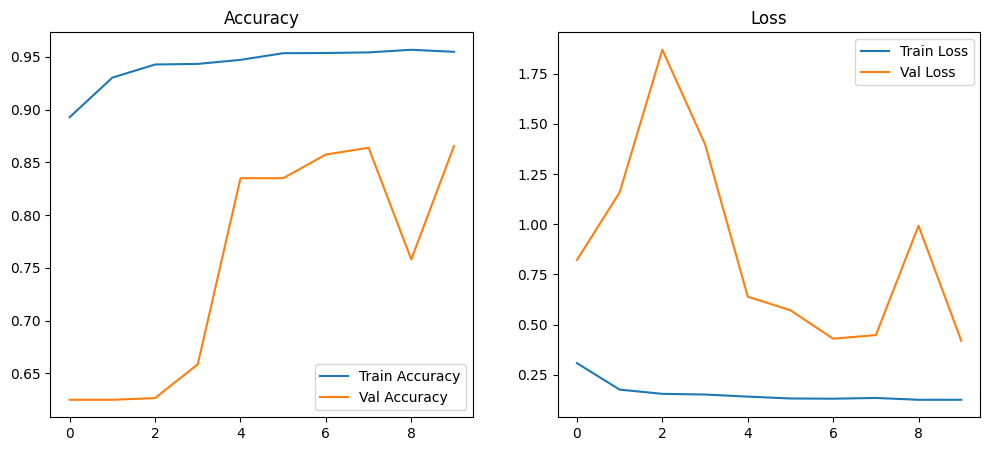

In [11]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [12]:
model.save("pneumonia_cnn_model.h5")
print("Model saved successfully!")


Model saved successfully!


In [13]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model

model = load_model("pneumonia_cnn_model.h5")

img = image.load_img(
    r"healthai_suite/Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0001-0001.jpeg",
    target_size=(224,224)
)
img = image.img_to_array(img)/255
img = np.expand_dims(img, axis=0)

pred = model.predict(img)[0][0]
print("Prediction:", "PNEUMONIA" if pred>0.5 else "NORMAL")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
Prediction: NORMAL


In [ ]:
from dotenv import load_dotenv
import os
from groq import Groq

# Load .env file
load_dotenv()

# Check API key
api_key = os.getenv("GROQ_API_KEY")

if not api_key:
    print("❌ GROQ_API_KEY not found")
    exit()

print("✅ GROQ_API_KEY found")

# Test Groq connection
client = Groq(api_key=api_key)

response = client.chat.completions.create(
    model="llama-3.1-8b-instant",
    messages=[
        {"role": "user", "content": "Say 'Groq connected successfully'"}
    ]
)

print("✅ Groq Response:")
print(response.choices[0].message.content)
